# plot CESO simple effects in surfplot

In [1]:
import os, glob
from os.path import join
import pandas as pd
from neuromaps.datasets import fetch_fslr, fetch_fsaverage
import numpy as np
from surfplot import Plot
import nibabel as nib
import neuromaps
from scipy import stats

In [2]:
con_dir = '/Users/h/Documents/projects_local/cue_expectancy/analysis/fmri/spm/univariate/model02_CESO/2ndlevel'

In [3]:
def plot_roi(roi_name, lh_labels, rh_labels, roi_dict, surfaces):
    # roi_name = "TPJ"
    lh, rh = surfaces
    p = Plot(surf_lh=lh, surf_rh=rh, size=(1000, 200), zoom=1.2, layout='row', views=['lateral', 'medial', 'ventral'], mirror_views=True)
    # fig = p.build()
    lh_roi_map = np.full(lh_labels.shape, np.nan)
    lh_roi_map[np.in1d(lh_labels, roi_dict[roi_name])] = 1

    rh_roi_map = np.full(rh_labels.shape, np.nan)
    rh_roi_map[np.in1d(rh_labels, roi_dict[roi_name])] = 1
    # plot_roi(lh_roi_map, rh_roi_map, roi_name, 'Reds')
    p.add_layer({'left': lh_roi_map, 'right': rh_roi_map}, cmap='YlOrRd_r', cbar=False)
    fig = p.build()
    fig.show()



def process_medial_wall(data_path, spm_dir, fslr_density='32k', data_dir='/tmp'):
    """
    Masks out the medial wall from the provided data.

    Parameters:
    - data_path: Path to the data file.
    - spm_dir: Directory containing the spm data.
    - fslr_density: Density of the fslr data (default is '32k').
    - data_dir: Directory to fetch the fslr data (default is '/tmp').

    Returns:
    - stimP_lh: Left hemisphere data with medial wall masked out.
    - stimP_rh: Right hemisphere data with medial wall masked out.
    """
    
    stimHgtL_P = neuromaps.transforms.mni152_to_fslr(
        join(spm_dir, data_path),
        fslr_density=fslr_density, 
        method='linear'
    )
    
    fslr = neuromaps.datasets.fetch_fslr(density=fslr_density, data_dir=data_dir)
    
    stimP_lh = stimHgtL_P[0].darrays[0].data
    stimP_rh = stimHgtL_P[1].darrays[0].data
    
    fslr_medial_L = nib.load(fslr['medial'][0])
    fslr_medial_R = nib.load(fslr['medial'][1])
    
    medial_indexL = np.where(fslr_medial_L.darrays[0].data == 0)[0]
    medial_indexR = np.where(fslr_medial_R.darrays[0].data == 0)[0]
    
    stimP_lh[medial_indexL] = np.nan
    stimP_rh[medial_indexR] = np.nan
    
    return stimP_lh, stimP_rh


def t2zmap(t_nii, df):
    t_map_data = t_nii.get_fdata()
    # Convert t-values to z-values
    z_map_data = stats.norm.ppf(stats.t.cdf(t_map_data, df))
    # Create a new Nifti image for the z-map
    z_map_nifti = image.new_img_like(t_nii, z_map_data)
    return z_map_nifti


## 1. convert MNI to fslr

In [4]:
stim_P = neuromaps.transforms.mni152_to_fslr(join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), fslr_density='32k', method='linear')
stim_V = neuromaps.transforms.mni152_to_fslr(join(con_dir,'model02-CESO_epoch-stimsimple_stim_V_fdr-001.nii'), fslr_density='32k', method='linear')
stim_C = neuromaps.transforms.mni152_to_fslr(join(con_dir,'model02-CESO_epoch-stimsimple_stim_C_fdr-001.nii'), fslr_density='32k', method='linear')

FileNotFoundError: No such file or no access: '/Users/h/Documents/projects_local/cue_expectancy/analysis/fmri/spm/univariate/model02_CESO/2ndlevel/model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'

In [26]:
stimP_lh_processed, stimP_rh_processed = process_medial_wall(
    data_path='model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii',
    spm_dir=con_dir
)

In [20]:
stimP_lh = stim_P[0].darrays[0].data
stimP_rh = stim_P[1].darrays[0].data
stimV_lh = stim_V[0].darrays[0].data
stimV_rh = stim_V[1].darrays[0].data
stimC_lh = stim_C[0].darrays[0].data
stimC_rh = stim_C[1].darrays[0].data

## 2. plot surface

## 2-1. pain

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_22266/3188018508.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


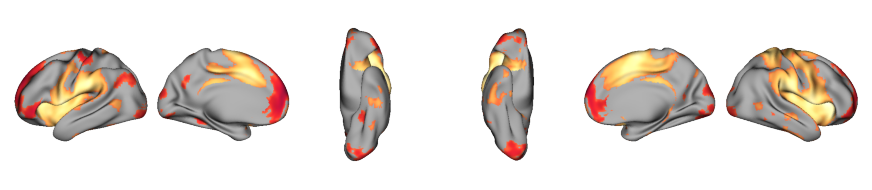

In [27]:
surfaces = neuromaps.datasets.fetch_fslr(density='32k', data_dir='/tmp')
lh, rh = surfaces['inflated']

p = Plot(surf_lh=lh, surf_rh=rh, size=(1000, 200), zoom=1.2, layout='row', views=['lateral', 'medial', 'ventral'], mirror_views=True)
p.add_layer({'left': stimP_lh_processed, 
             'right': stimP_rh_processed}, 
             cmap='YlOrRd_r', cbar=False)
fig = p.build()
fig.show()


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/find_cuts.py:66: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  warnings.warn(
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


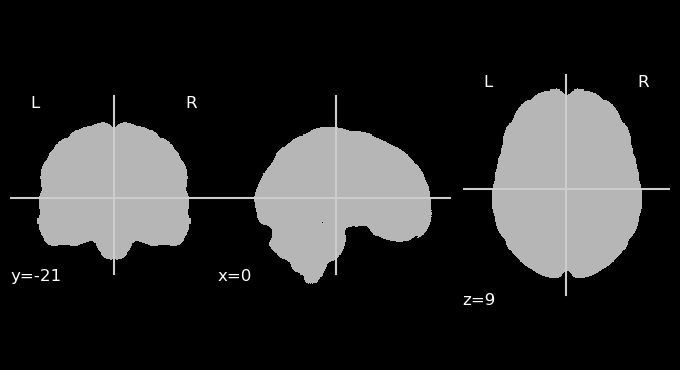

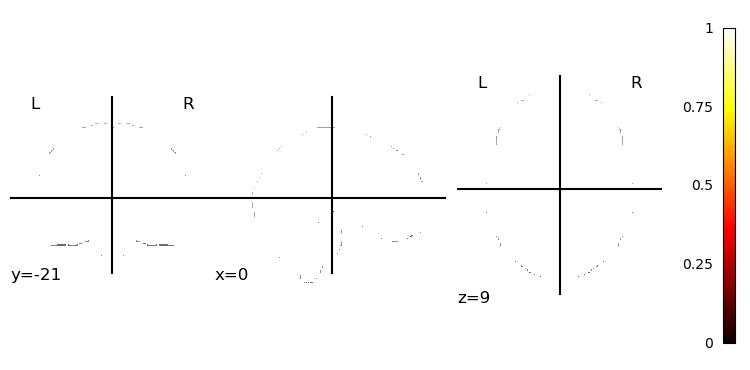

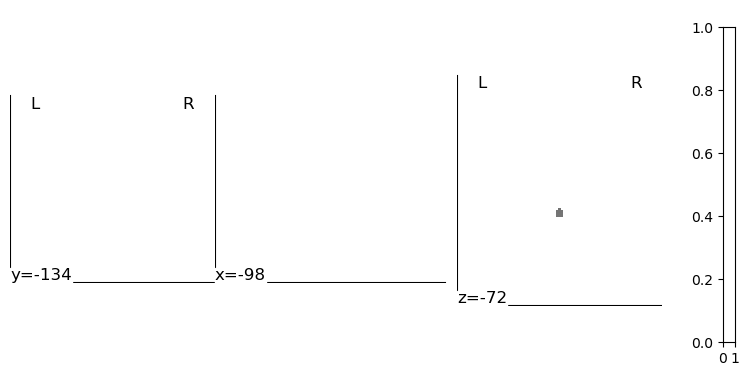

In [79]:
plotting.plot_anat(mni_brain_mask)
plotting.plot_stat_map(mni_brain_mask)
eroded_brain_mask = image.math_img("np.clip(img - 1, 0, 1)", img=mni_brain_mask)
plotting.plot_stat_map(eroded_brain_mask)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


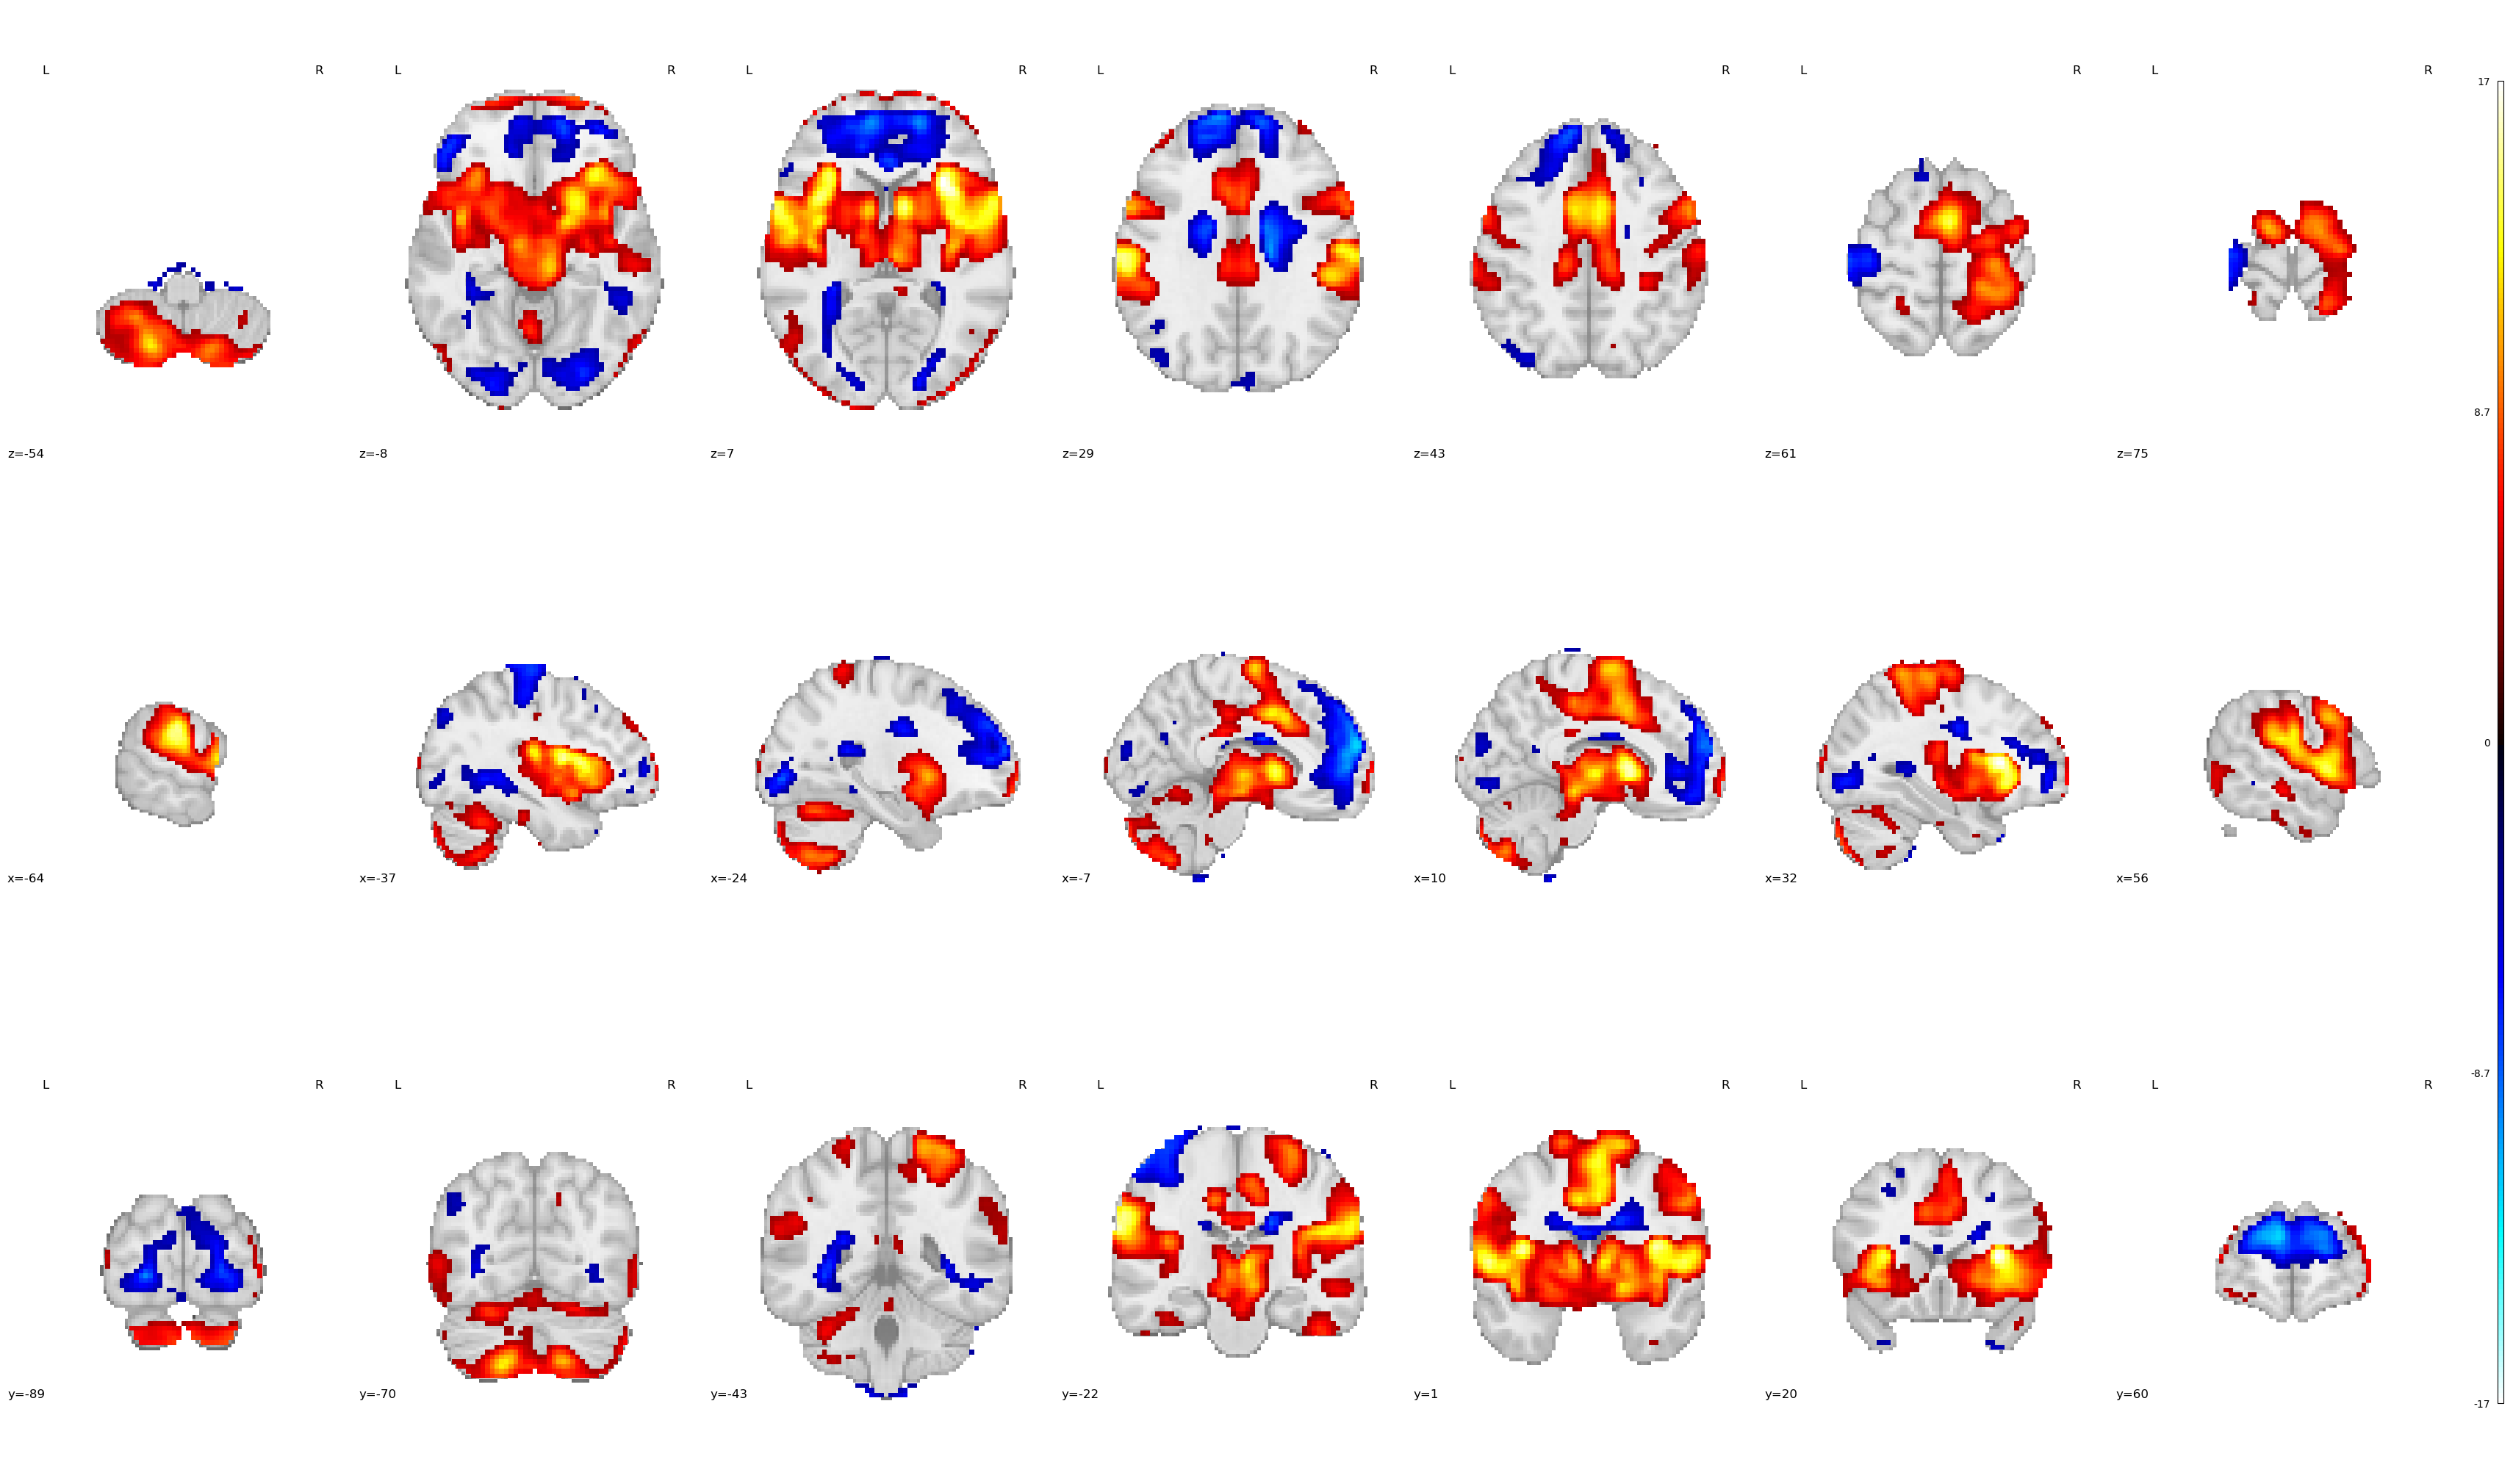

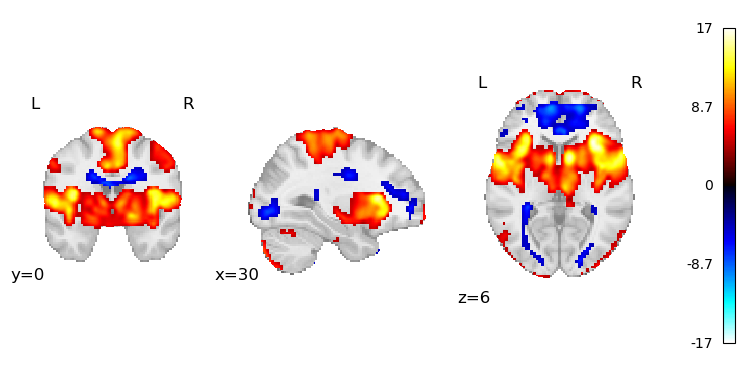

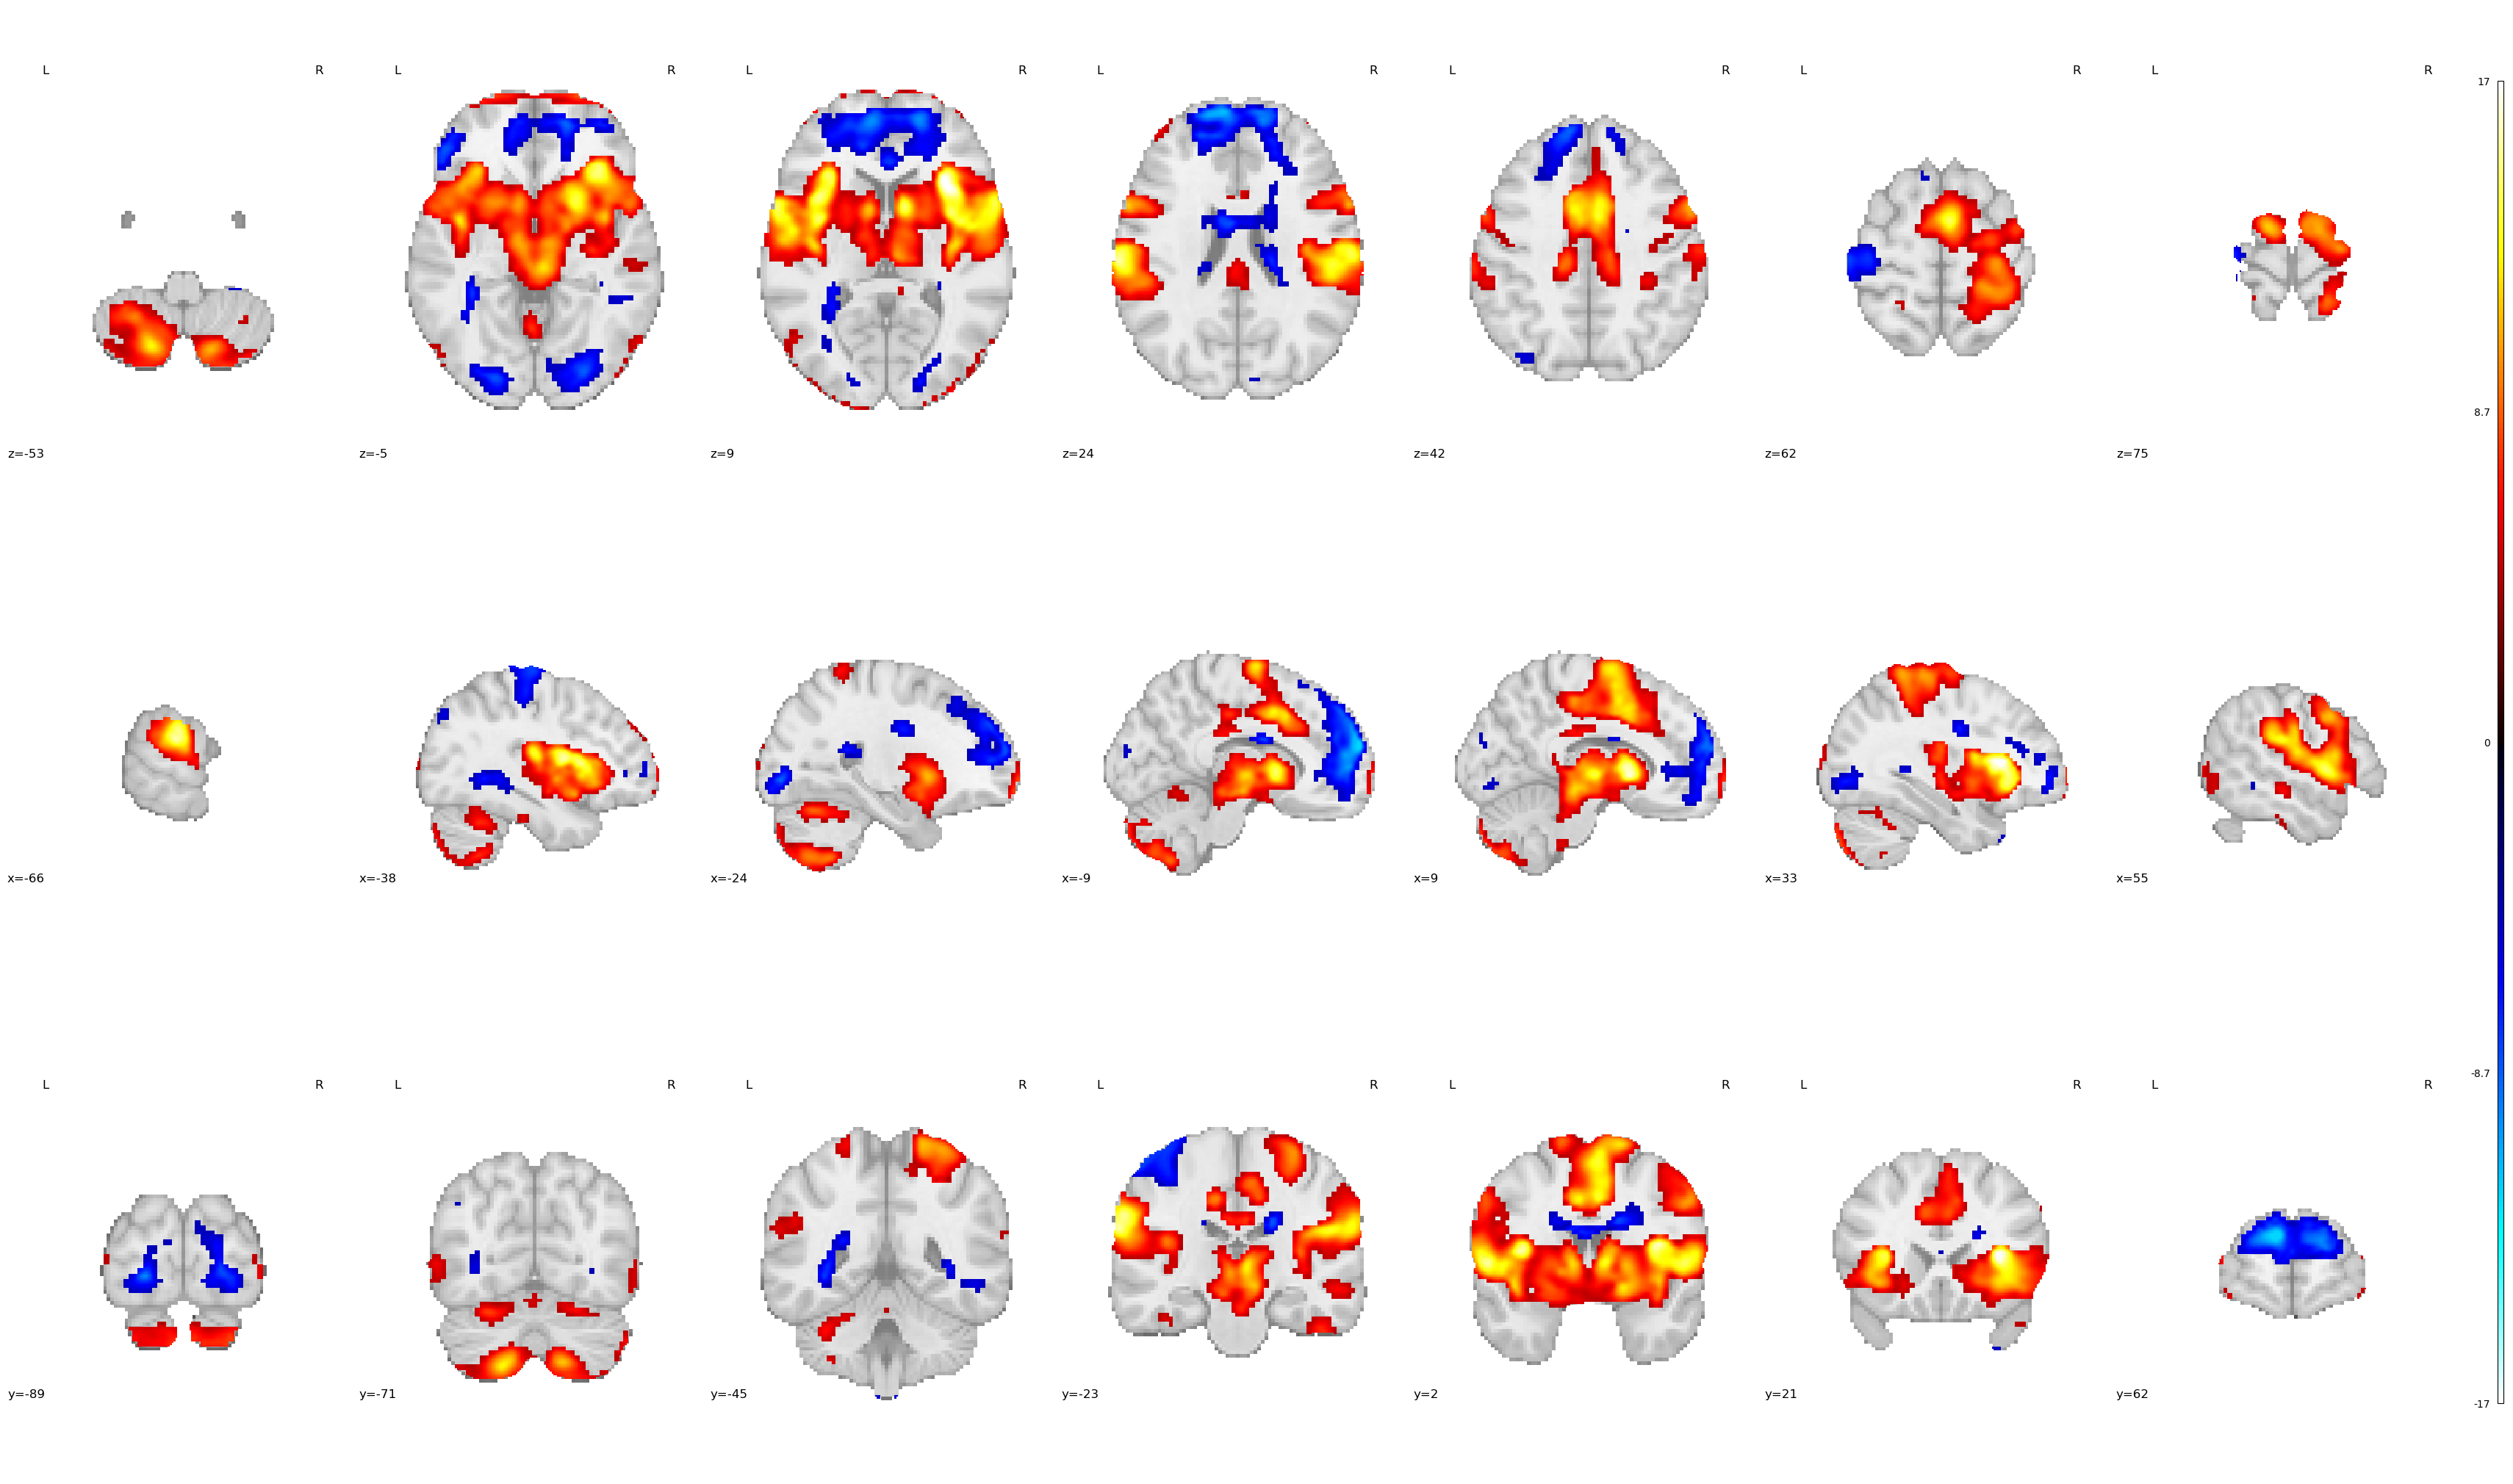

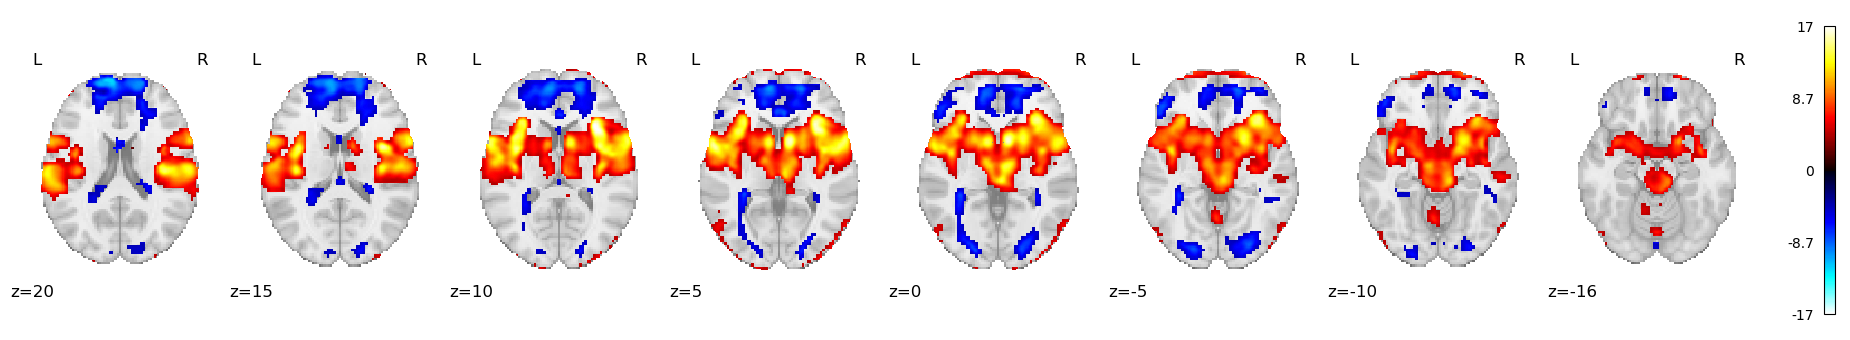

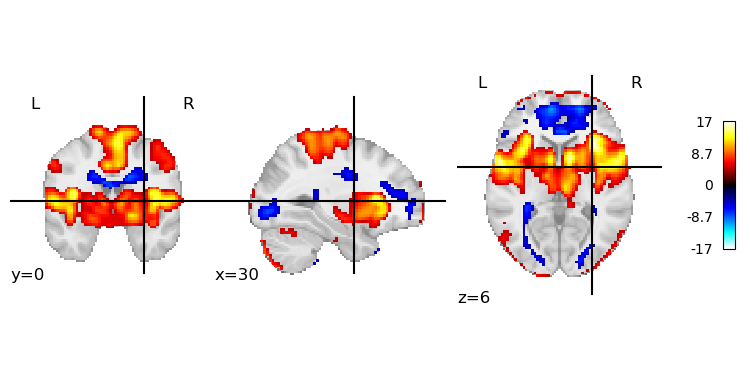

In [106]:
from nilearn.input_data import NiftiMasker
# apply mask
mask = '/Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_icbm.nii'
single_nii = nib.load(join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-0001.nii'))
# nilearn.image.concat_imgs
# nifti_masker = NiftiMasker(mask_img=None,mask_strategy='epi',
#                        standardize=False, memory='nilearn_cache',
#                        memory_level=1)
# fmri_masked = nifti_masker.fit_transform(single_nii)
# masked_brain_image = nifti_masker.inverse_transform(fmri_masked)

############################
#  mni brain mask
from nilearn import datasets, plotting, masking
from nilearn.input_data import NiftiMasker
mni_brain_mask = datasets.load_mni152_brain_mask()
masker = NiftiMasker(mask_img=mni_brain_mask)

data = single_nii.get_fdata()
data[data == 0] = np.nan  # Replace 0 with NaN
stat_map_img = nib.Nifti1Image(data, affine=single_nii.affine)

masked_stat_map = masker.fit_transform(stat_map_img)
masked_stat_map_img = masker.inverse_transform(masked_stat_map)
zmap = t2zmap(masked_stat_map_img, df=97)
############################
# plot stat map
plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-0001.nii'), 
                       display_mode='mosaic')

plotting.plot_stat_map(masked_stat_map_img, #join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), 
                       display_mode='ortho', 
                       draw_cross=False)

plotting.plot_stat_map(masked_stat_map_img, #join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), 
                       display_mode='mosaic', 
                       draw_cross=False)

z_values = [20, 15, 10, 5, 0, -5, -10, -16]
plotting.plot_stat_map(masked_stat_map_img, #join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), 
                       display_mode='z', 
                       cut_coords=z_values,
                       draw_cross=False)

display = plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-0001.nii'), 
                       display_mode='ortho')

cbar = display._cbar
cbar.ax.set_aspect(.3)

# vicarious
surface maps

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_22266/1878716953.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


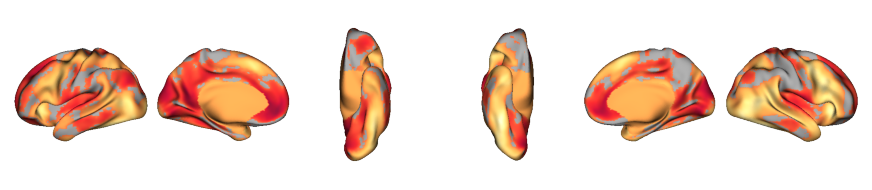

In [22]:
surfaces = neuromaps.datasets.fetch_fslr(density='32k', data_dir='/tmp')
lh, rh = surfaces['inflated']

p = Plot(surf_lh=lh, surf_rh=rh, size=(1000, 200), zoom=1.2, layout='row', views=['lateral', 'medial', 'ventral'], mirror_views=True)
p.add_layer({'left': stimV_lh, 
             'right': stimV_rh}, 
             cmap='YlOrRd_r', cbar=False)
fig = p.build()
fig.show()


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


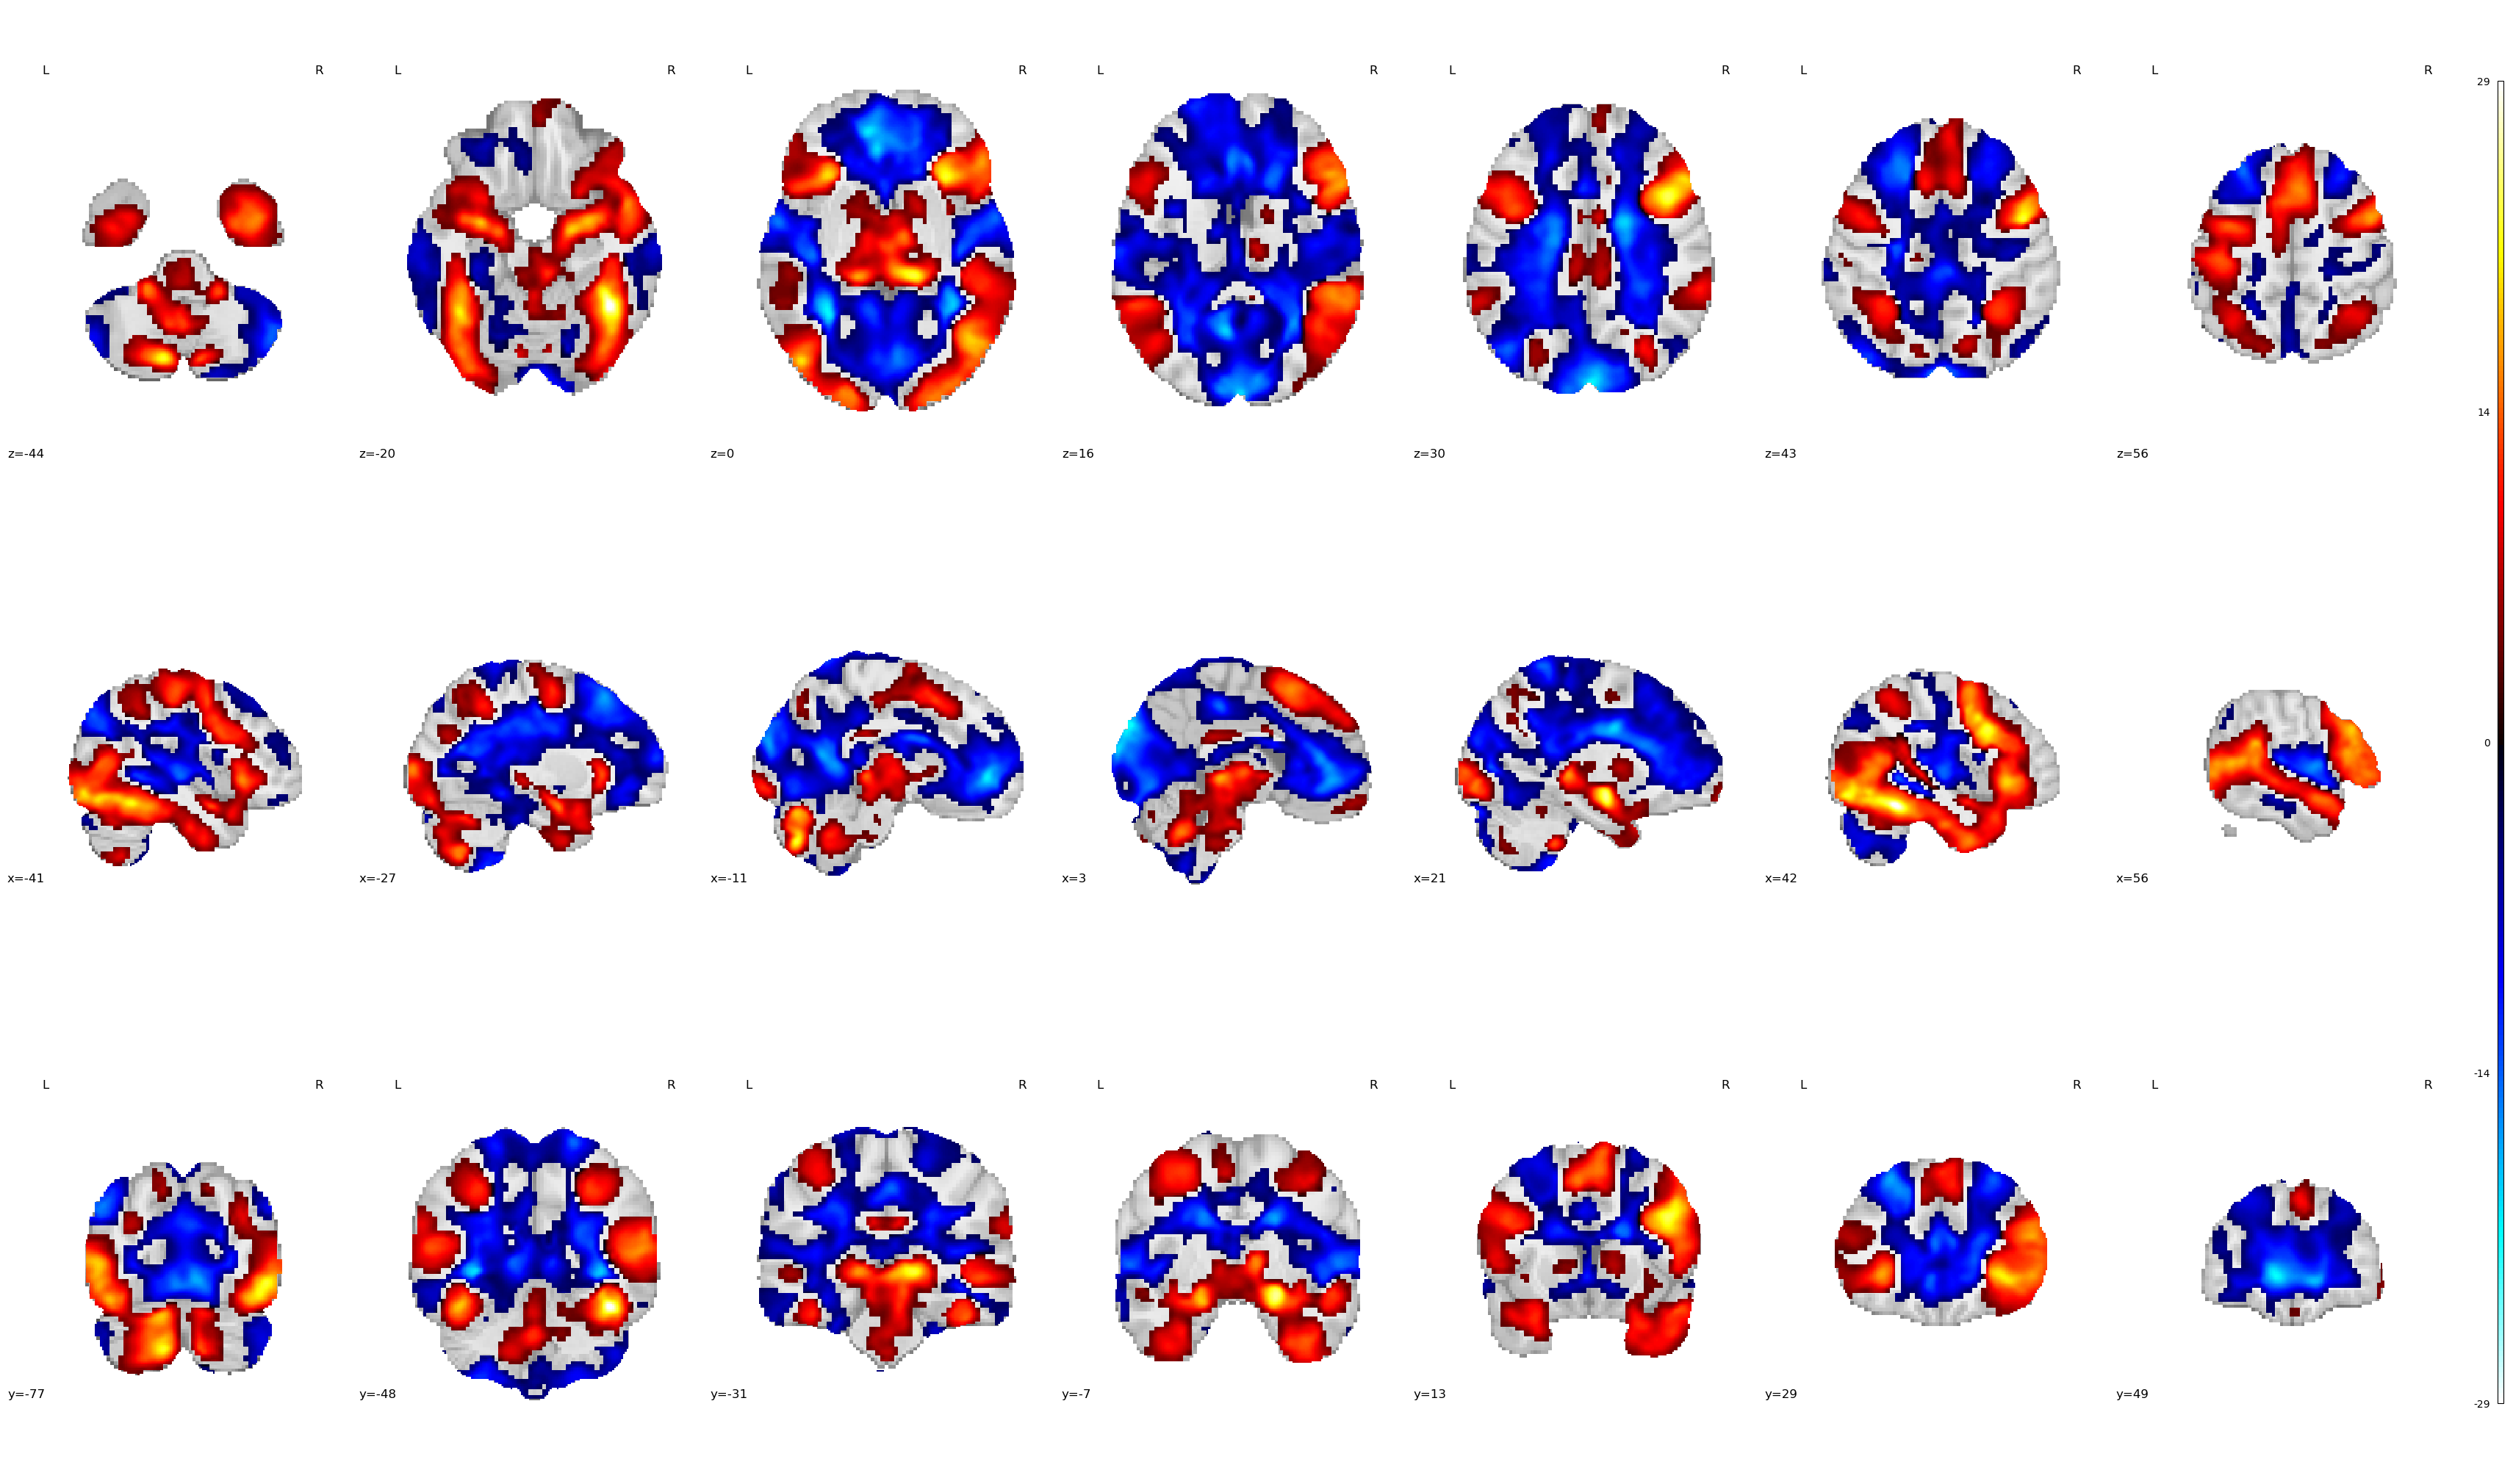

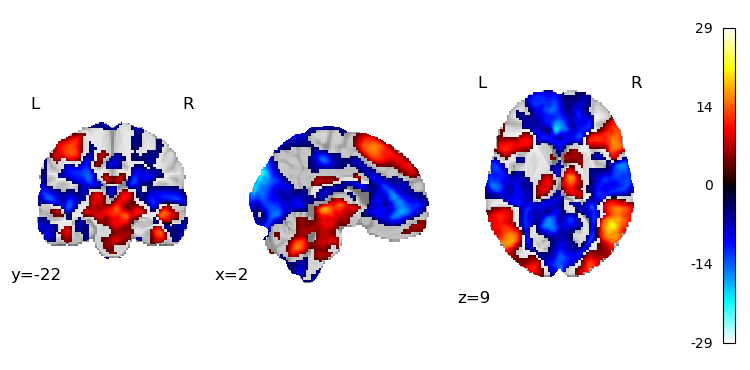

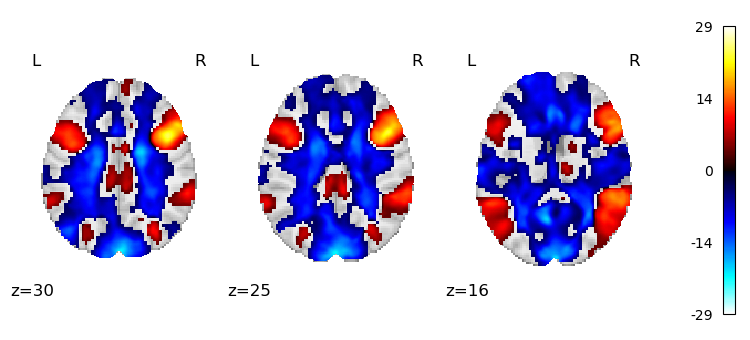

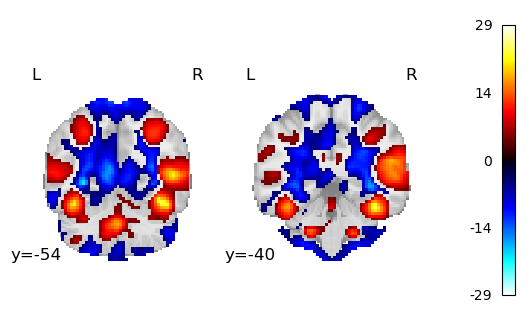

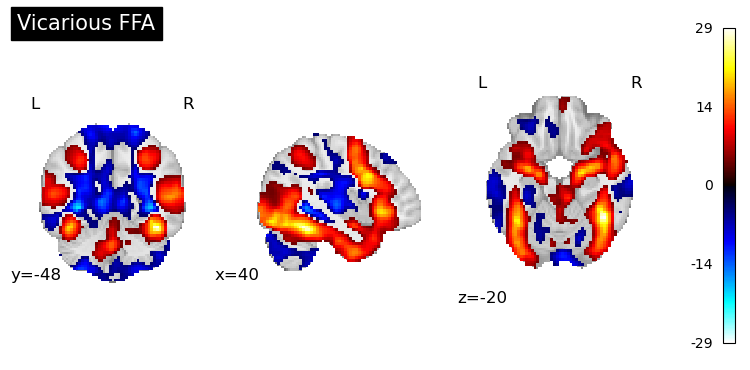

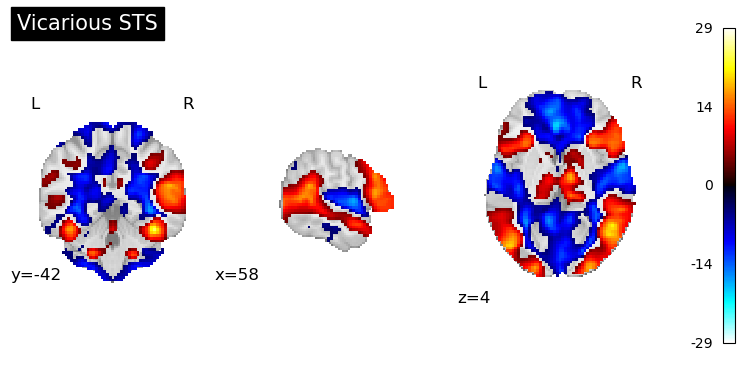

In [121]:
from nilearn import datasets, plotting, masking
from nilearn.input_data import NiftiMasker
############################
#  mni brain mask
mni_brain_mask = datasets.load_mni152_brain_mask()
masker = NiftiMasker(mask_img=mni_brain_mask)

single_nii = nib.load(join(con_dir,'model02-CESO_epoch-stimsimple_stim_V_fdr-001.nii'))
data = single_nii.get_fdata()
data[data == 0] = np.nan  # Replace 0 with NaN
stat_map_img = nib.Nifti1Image(data, affine=single_nii.affine)

masked_stat_map = masker.fit_transform(stat_map_img)
masked_stat_map_V = masker.inverse_transform(masked_stat_map)

############################
plotting.plot_stat_map(masked_stat_map_V, #join(con_dir,'model02-CESO_epoch-stimsimple_stim_V_fdr-001.nii'), 
                       display_mode='mosaic')
plotting.plot_stat_map(masked_stat_map_V, #join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), 
                       display_mode='ortho', 
                       draw_cross=False)

z_values = [30, 25, 16]
plotting.plot_stat_map(masked_stat_map_V, #join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), 
                       display_mode='z', 
                       cut_coords=z_values,
                       draw_cross=False)

y_values = [-54, -40]
plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimsimple_stim_V_fdr-0001.nii'), #join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), 
                       display_mode='y', 
                       cut_coords=y_values,
                       draw_cross=False)
plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimsimple_stim_V_fdr-0001.nii'), #join(con_dir,'model02-CESO_epoch-stimsimple_stim_V_fdr-001.nii'), 
                       display_mode='ortho', 
                       cut_coords=(40, -48, -20), 
                       draw_cross=False, 
                       title='Vicarious FFA')
plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimsimple_stim_V_fdr-0001.nii'), #join(con_dir,'model02-CESO_epoch-stimsimple_stim_V_fdr-001.nii'), 
                       display_mode='ortho', 
                       cut_coords=(58, -42, 4), 
                       draw_cross=False, 
                       title='Vicarious STS')

# cognitive

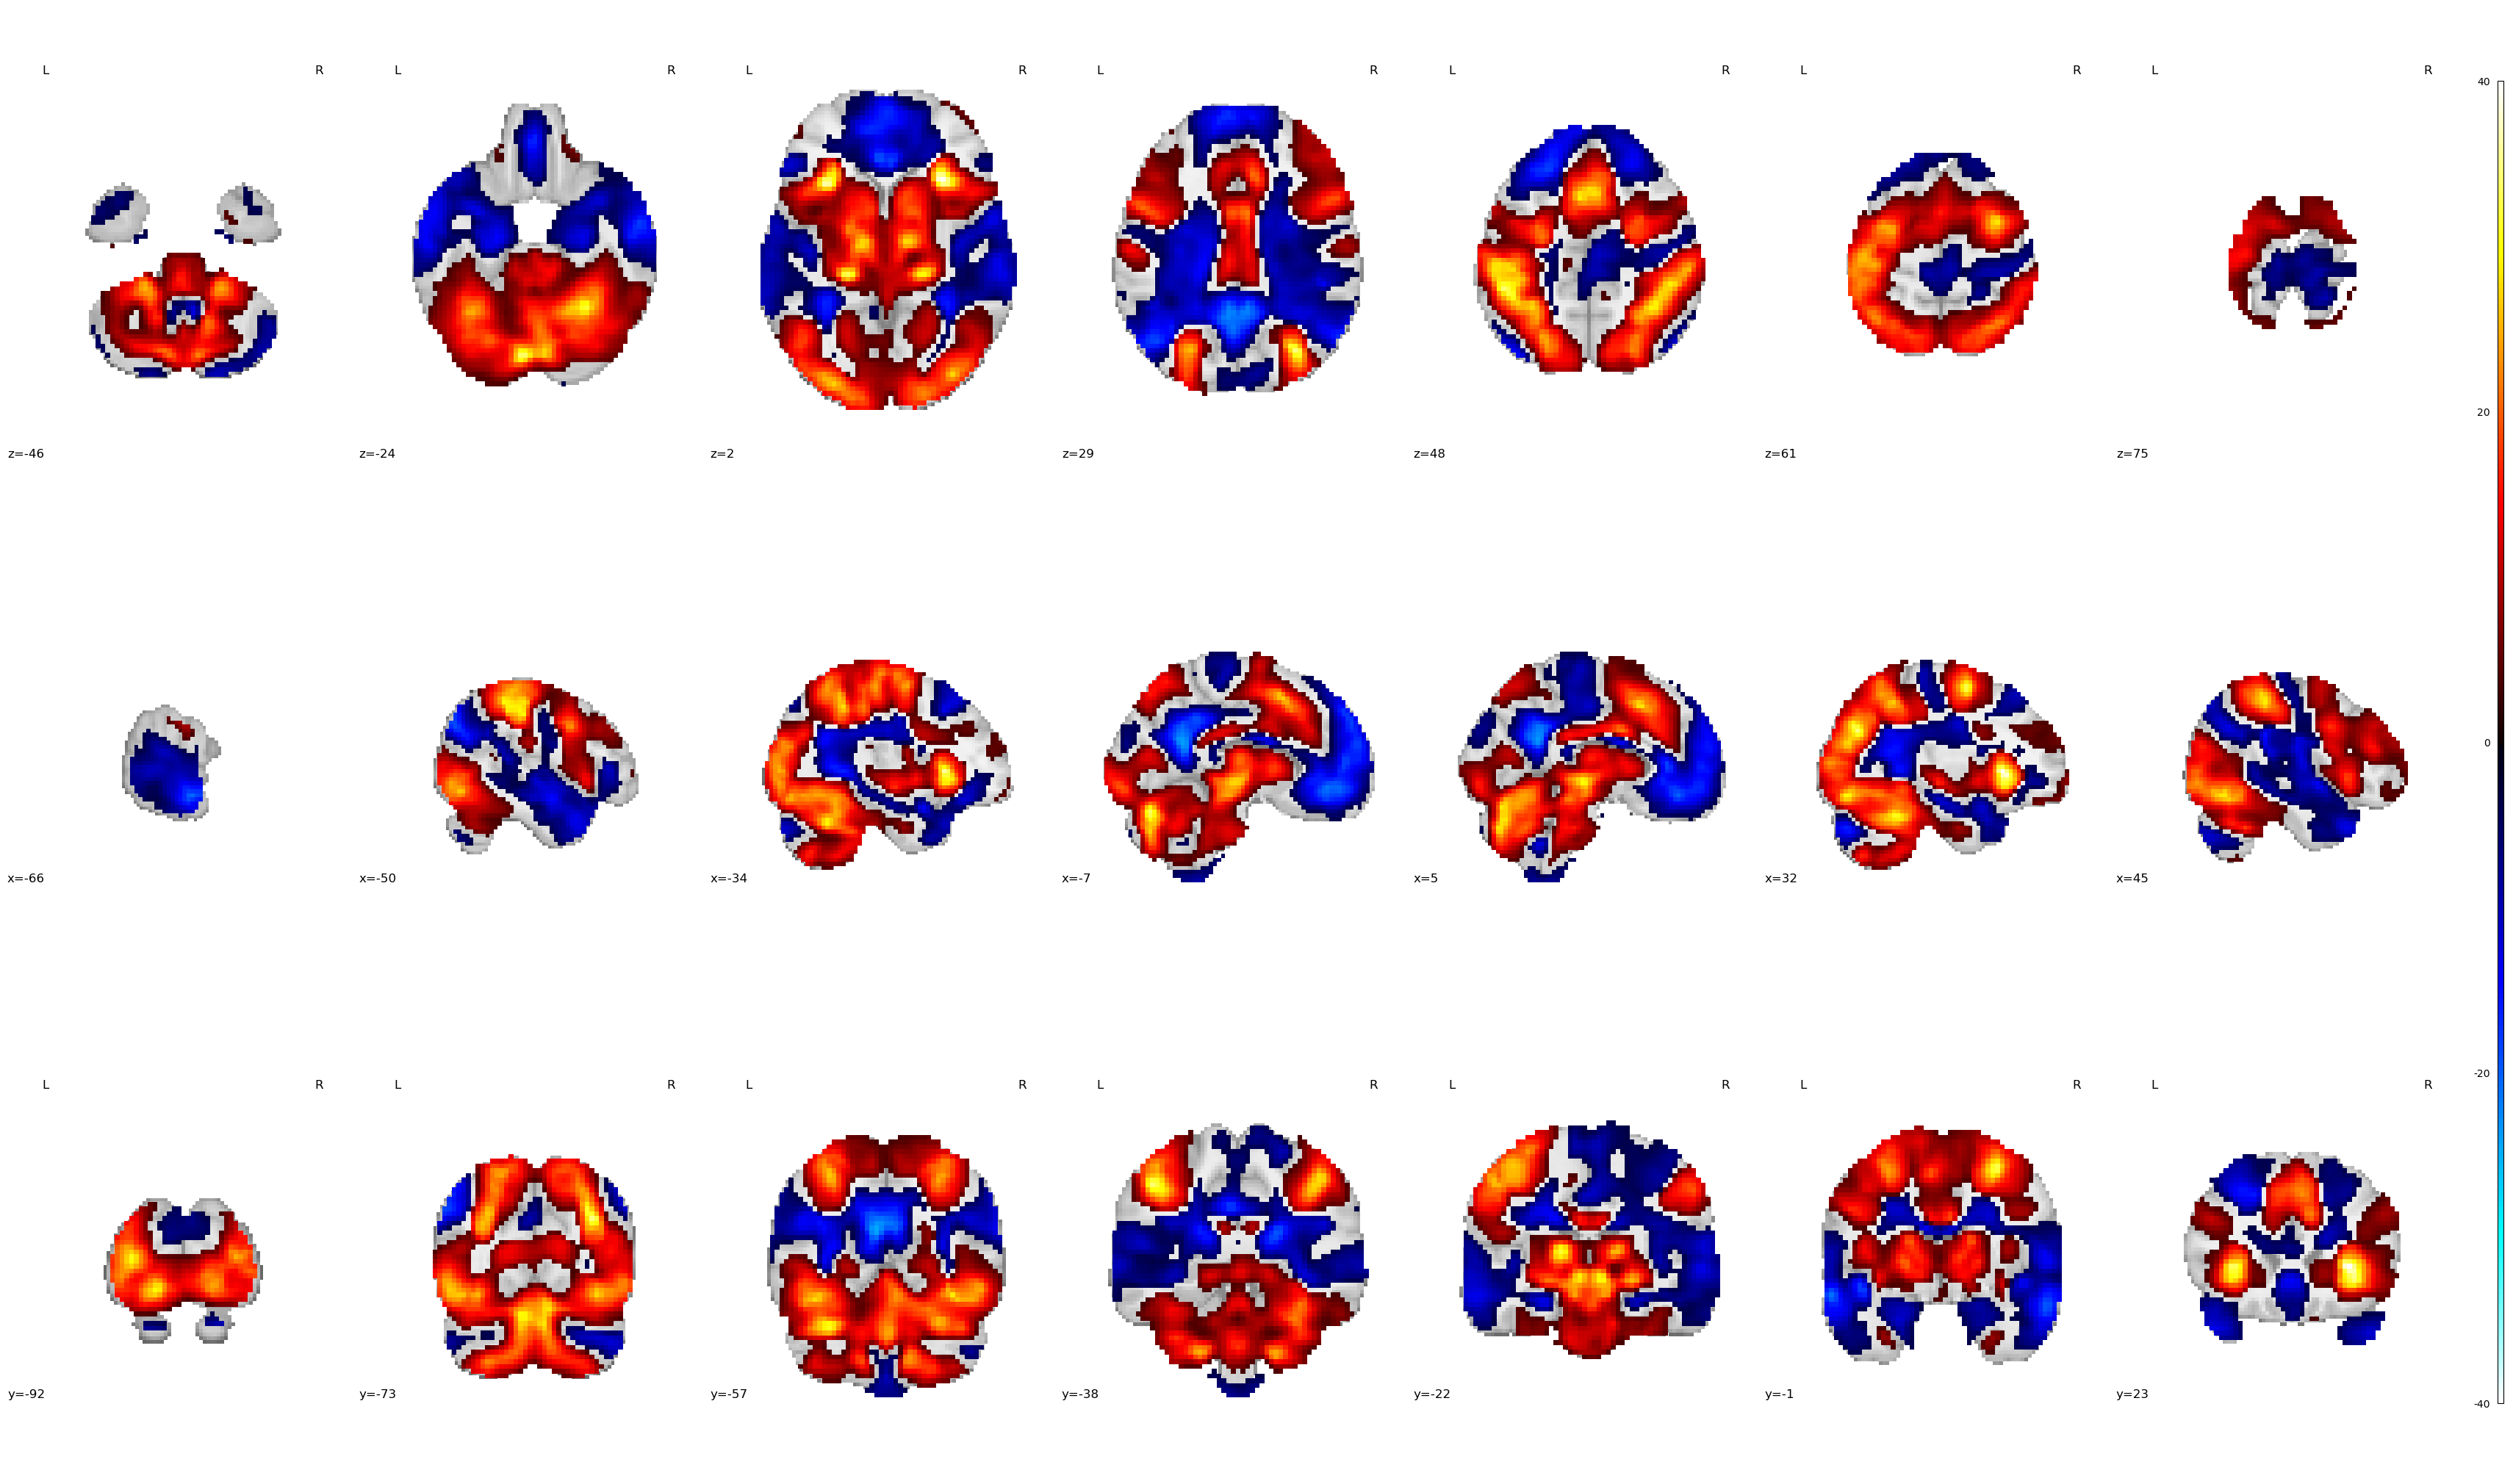

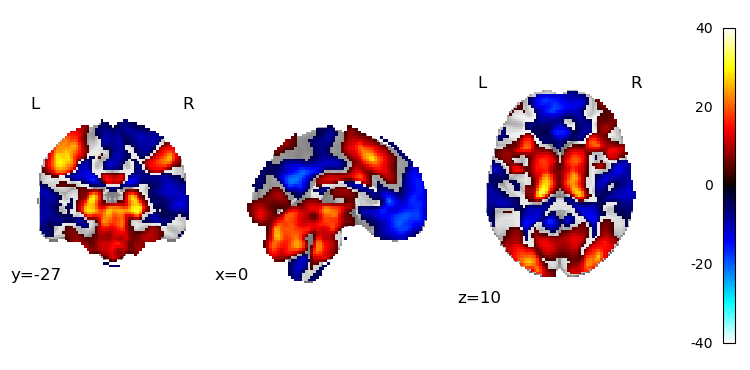

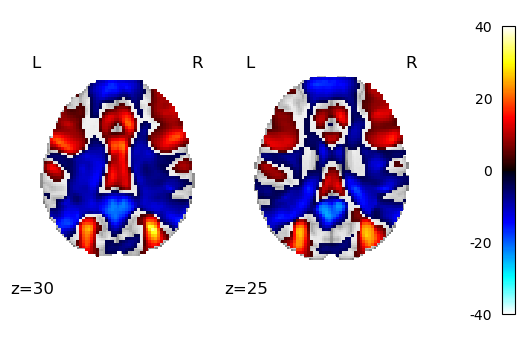

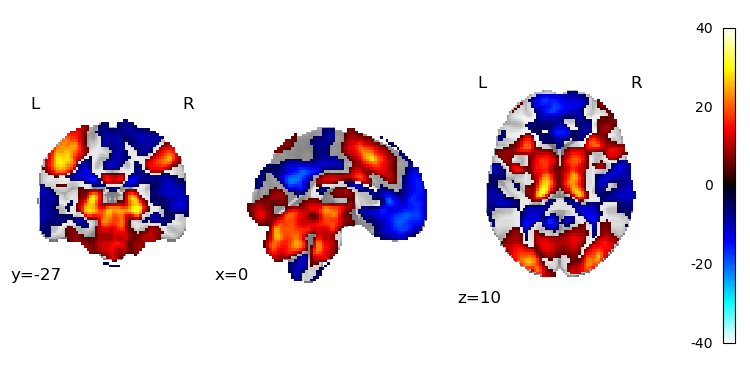

In [91]:
plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimsimple_stim_C_fdr-001.nii'), 
                       display_mode='mosaic')
plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimsimple_stim_C_fdr-001.nii'), 
                       display_mode='ortho',
                       draw_cross=False)

z_values = [30, 25]
plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimsimple_stim_C_fdr-001.nii'), #join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), 
                       display_mode='z', 
                       cut_coords=z_values,
                       draw_cross=False)

plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimsimple_stim_C_fdr-0001.nii'), 
                       display_mode='ortho',
                       draw_cross=False)

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_22266/1244059694.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


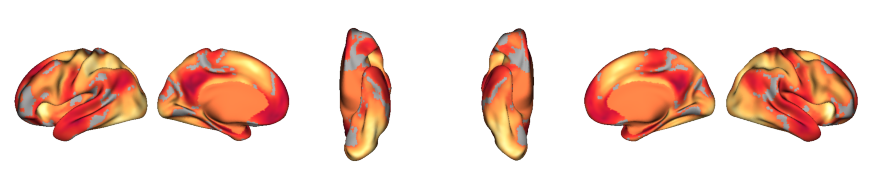

In [86]:
surfaces = neuromaps.datasets.fetch_fslr(density='32k', data_dir='/tmp')
lh, rh = surfaces['inflated']

p = Plot(surf_lh=lh, surf_rh=rh, size=(1000, 200), zoom=1.2, layout='row', views=['lateral', 'medial', 'ventral'], mirror_views=True)
p.add_layer({'left': stimC_lh, 
             'right': stimC_rh}, 
             cmap='YlOrRd_r', cbar=False)
fig = p.build()
fig.show()


# motor

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


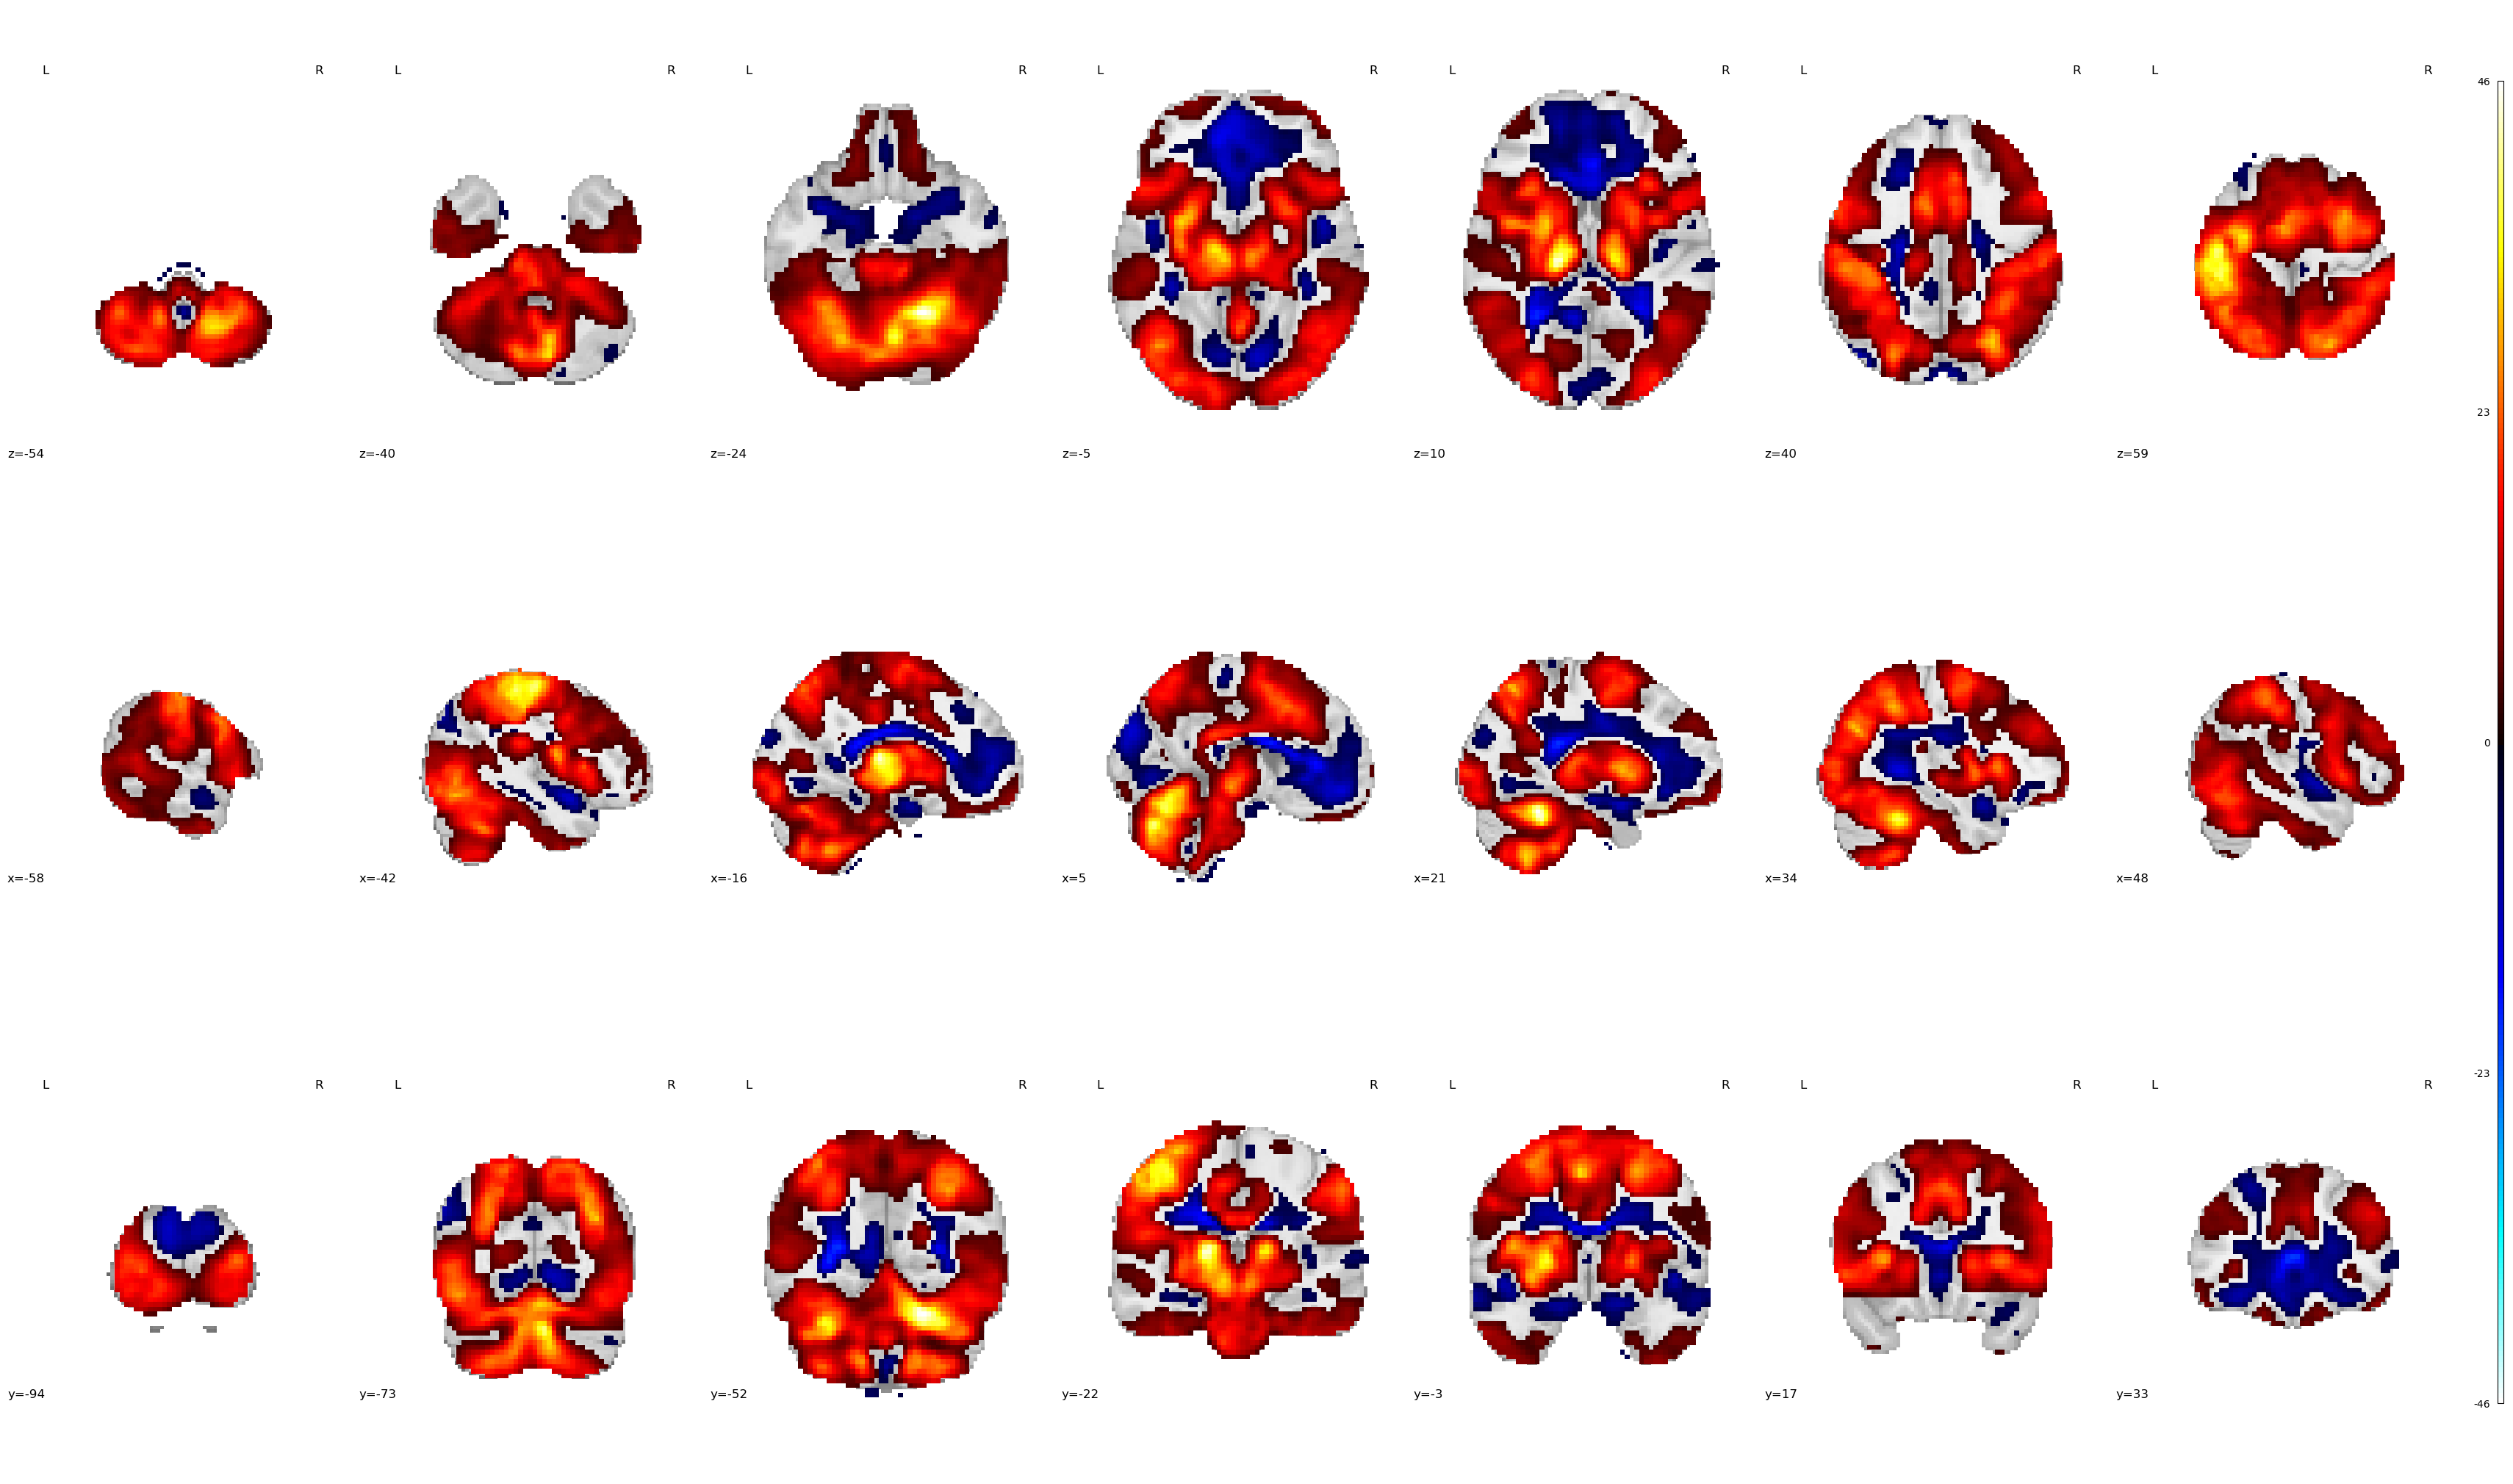

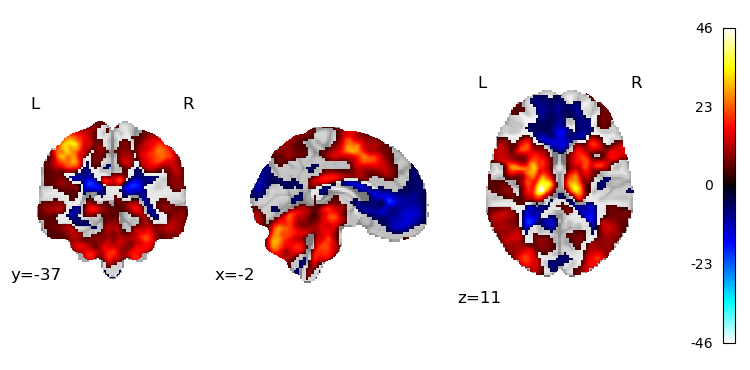

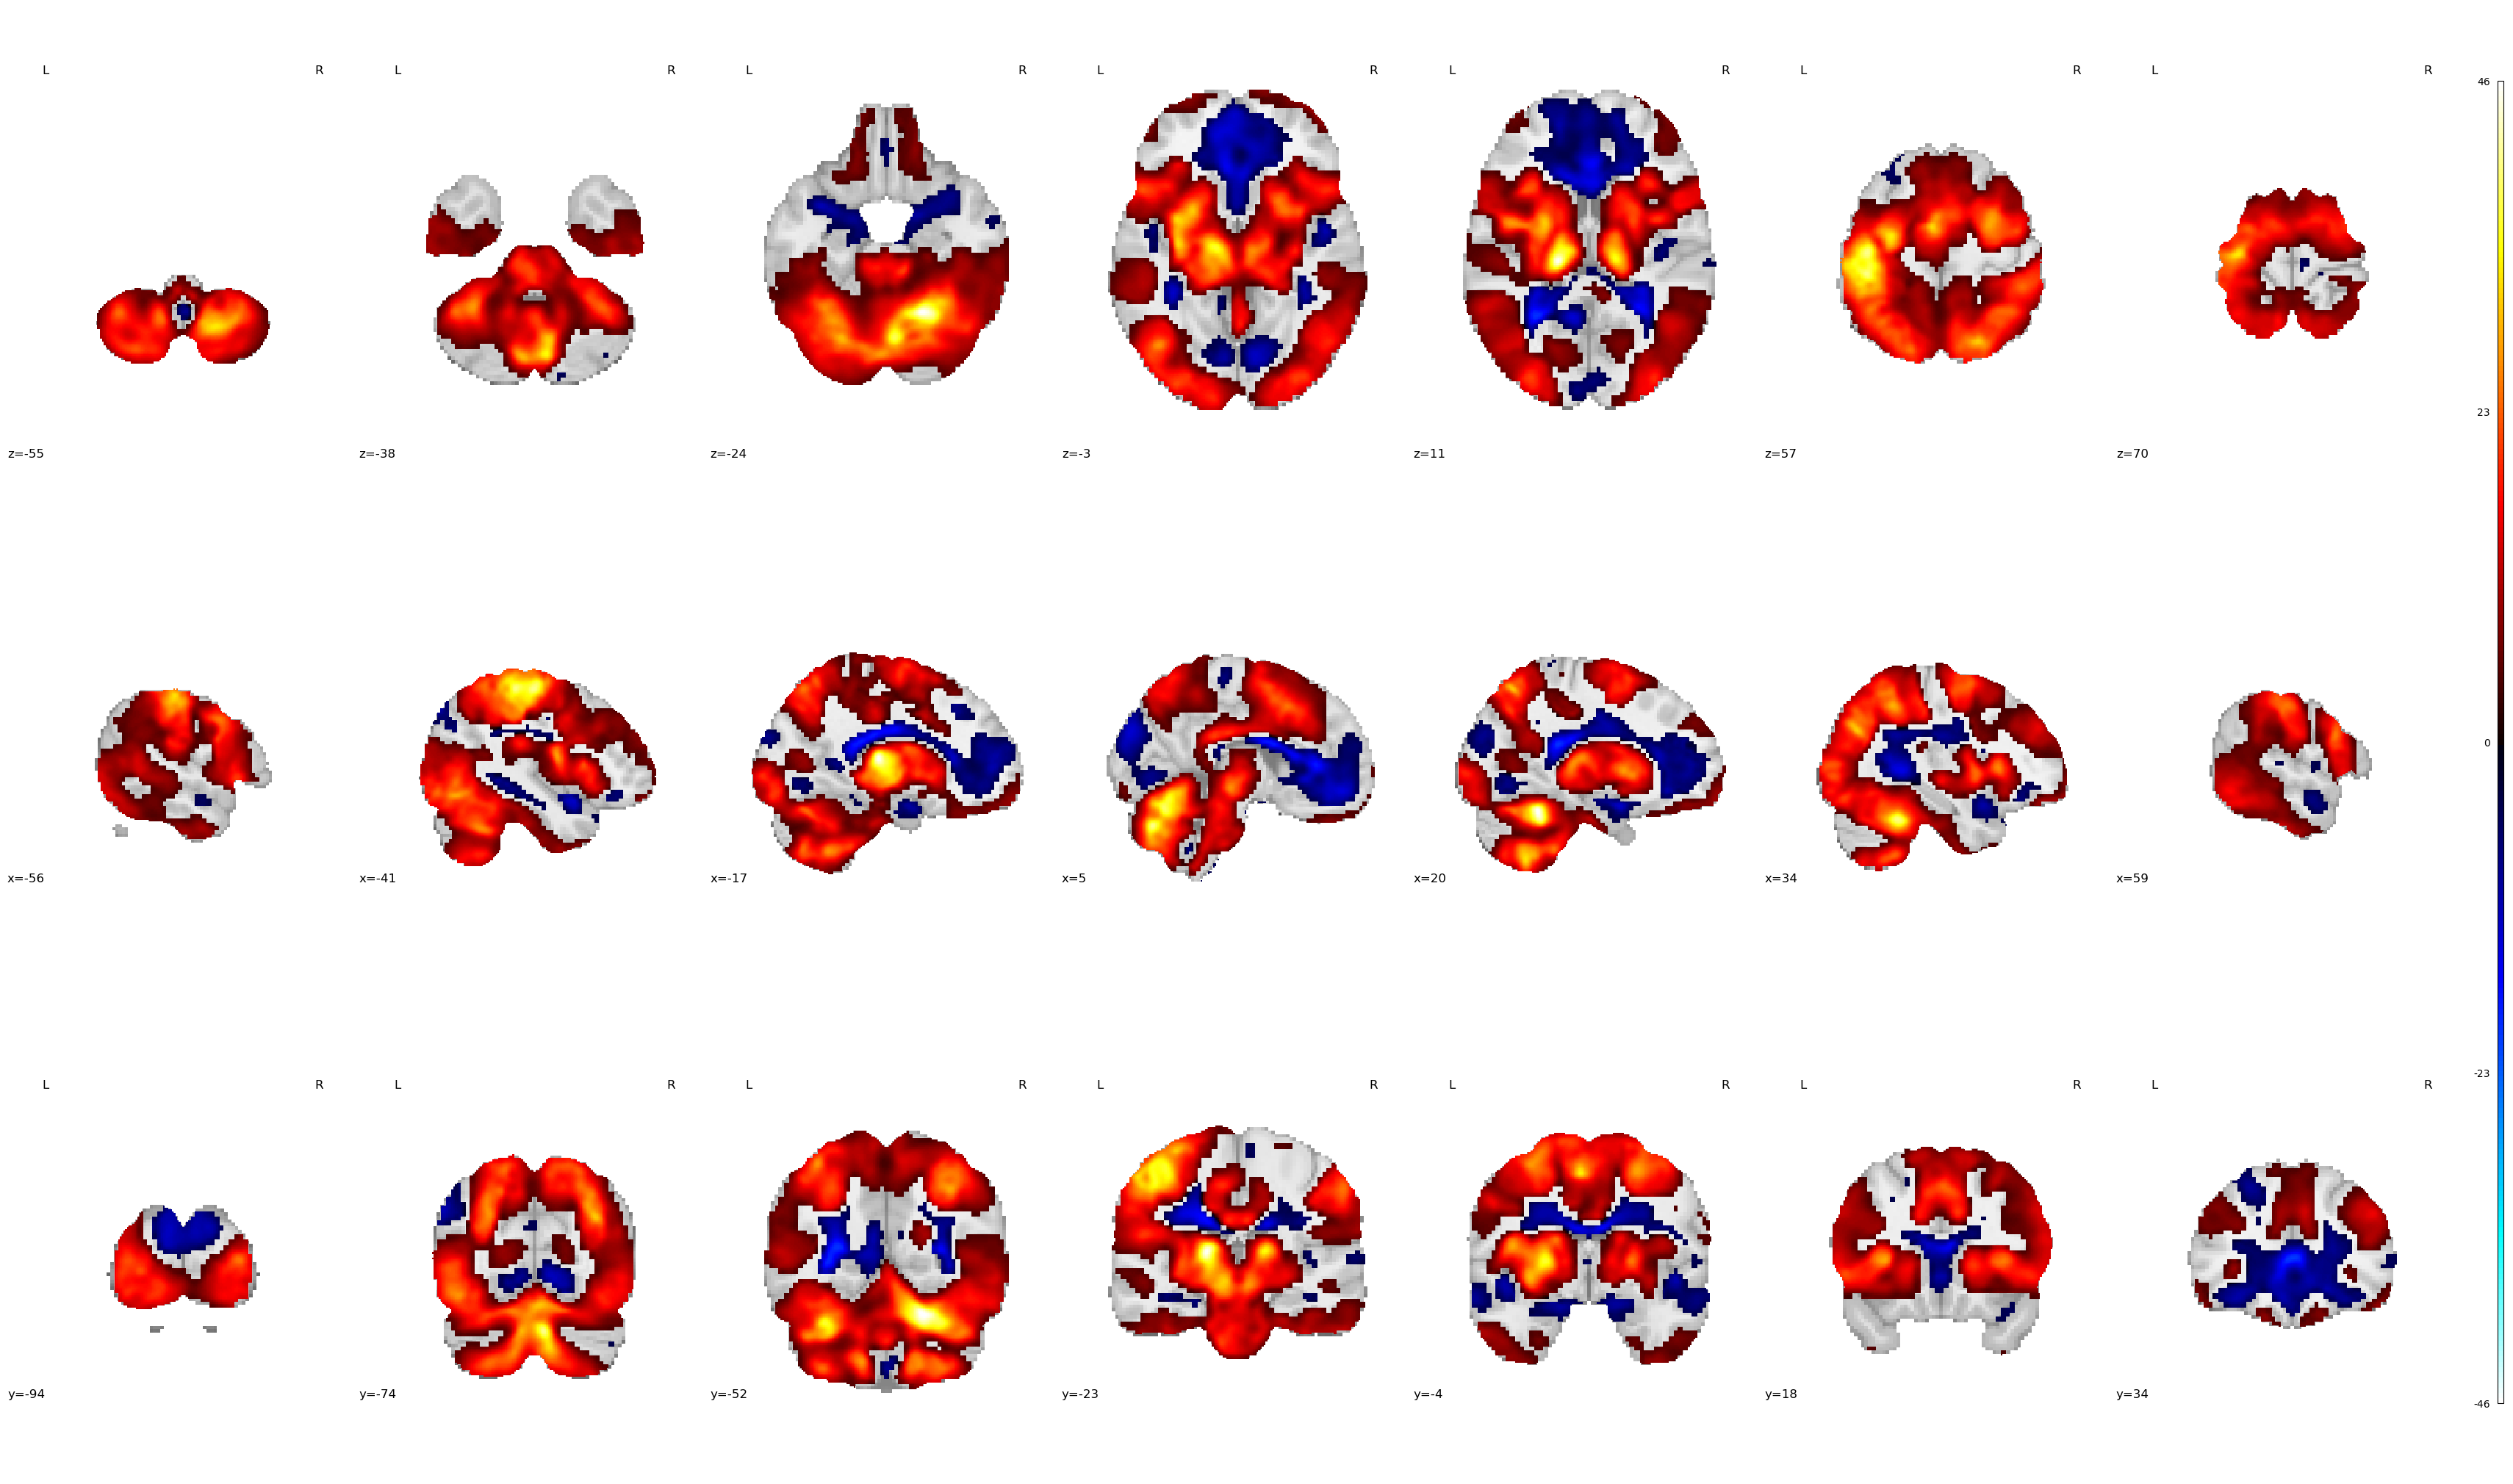

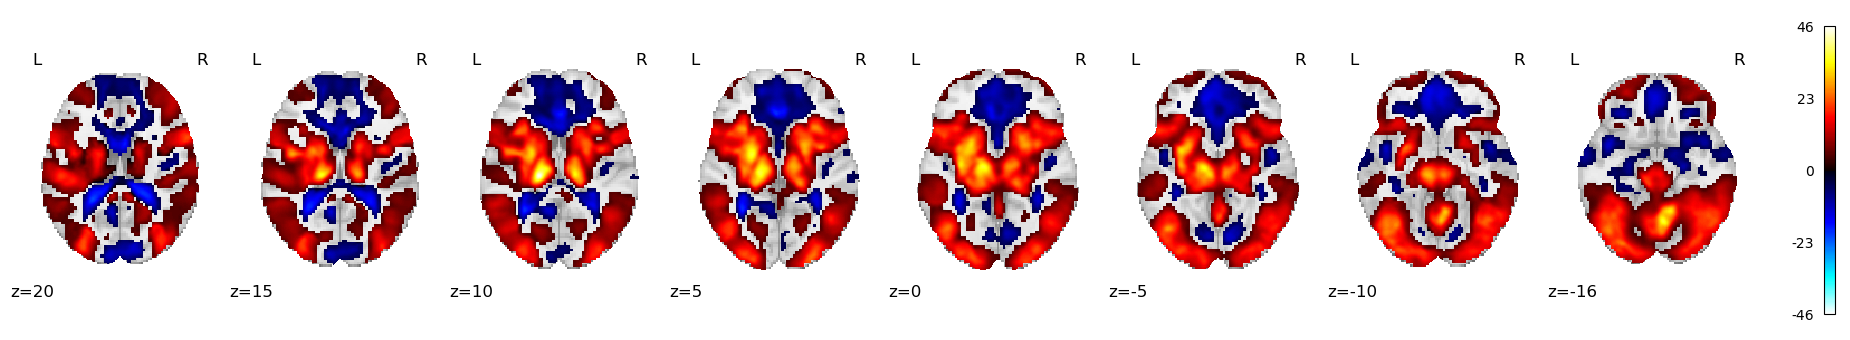

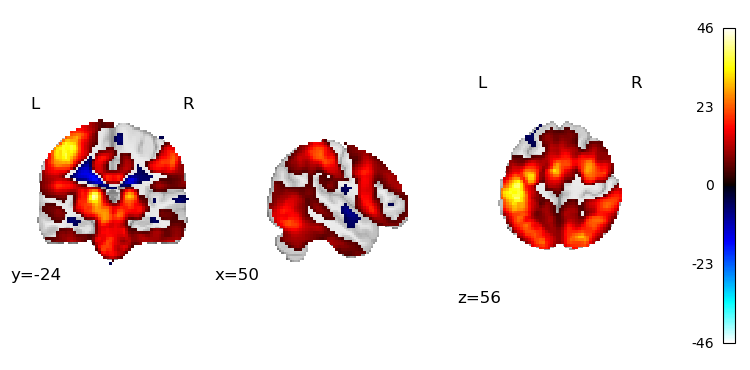

In [109]:
from nilearn.input_data import NiftiMasker
# apply mask
mask = '/Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_icbm.nii'
single_nii = nib.load(join(con_dir,'model02-CESO_epoch-stimmotor_fdr-0001.nii'))
# nilearn.image.concat_imgs
# nifti_masker = NiftiMasker(mask_img=None,mask_strategy='epi',
#                        standardize=False, memory='nilearn_cache',
#                        memory_level=1)
# fmri_masked = nifti_masker.fit_transform(single_nii)
# masked_brain_image = nifti_masker.inverse_transform(fmri_masked)

############################
#  mni brain mask
from nilearn import datasets, plotting, masking
from nilearn.input_data import NiftiMasker
mni_brain_mask = datasets.load_mni152_brain_mask()
masker = NiftiMasker(mask_img=mni_brain_mask)

data = single_nii.get_fdata()
data[data == 0] = np.nan  # Replace 0 with NaN
stat_map_img = nib.Nifti1Image(data, affine=single_nii.affine)

masked_stat_map = masker.fit_transform(stat_map_img)
masked_stat_map_img = masker.inverse_transform(masked_stat_map)
zmap = t2zmap(masked_stat_map_img, df=97)
############################
# plot stat map
plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimmotor_fdr-001.nii'), 
                       display_mode='mosaic')

plotting.plot_stat_map(masked_stat_map_img, #join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), 
                       display_mode='ortho', 
                       draw_cross=False)

plotting.plot_stat_map(masked_stat_map_img, #join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), 
                       display_mode='mosaic', 
                       draw_cross=False)

z_values = [20, 15, 10, 5, 0, -5, -10, -16]
plotting.plot_stat_map(masked_stat_map_img, #join(con_dir,'model02-CESO_epoch-stimsimple_stim_P_fdr-001.nii'), 
                       display_mode='z', 
                       cut_coords=z_values,
                       draw_cross=False)

display = plotting.plot_stat_map(join(con_dir,'model02-CESO_epoch-stimmotor_fdr-0001.nii'), 
                       display_mode='ortho', 
                       cut_coords=(50,-24,56),
                       draw_cross=False)

cbar = display._cbar
cbar.ax.set_aspect(.3)

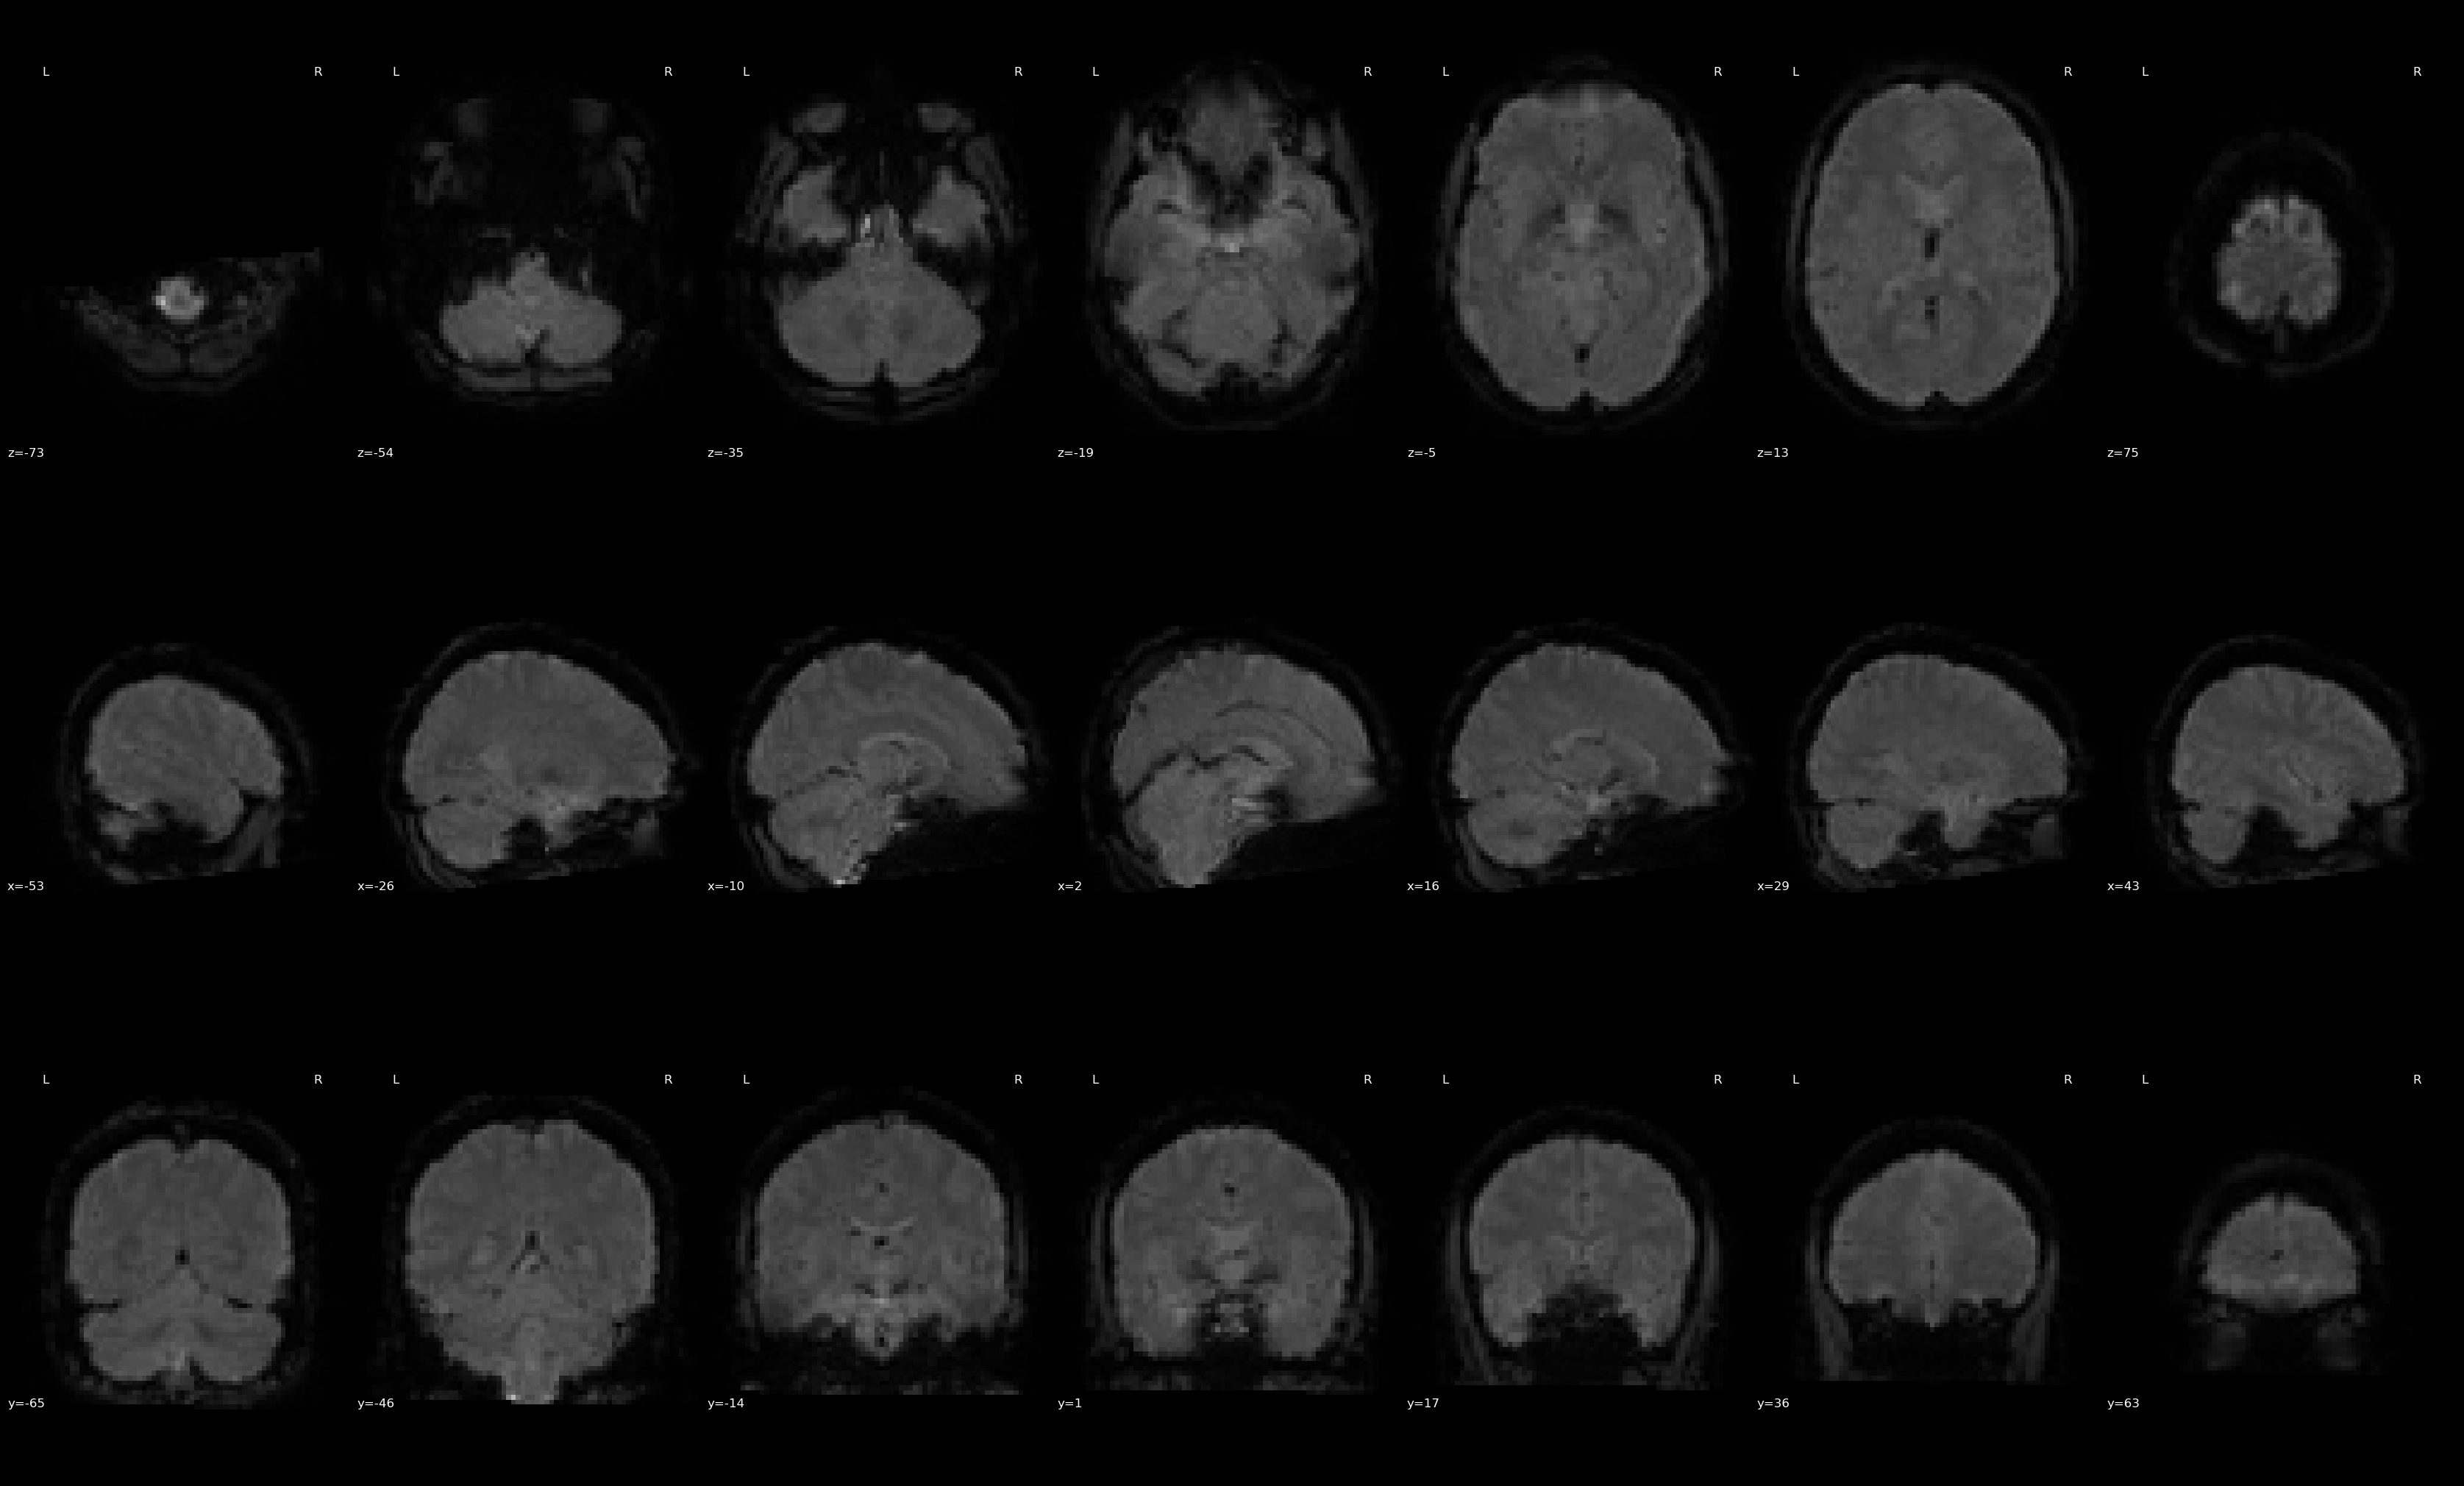

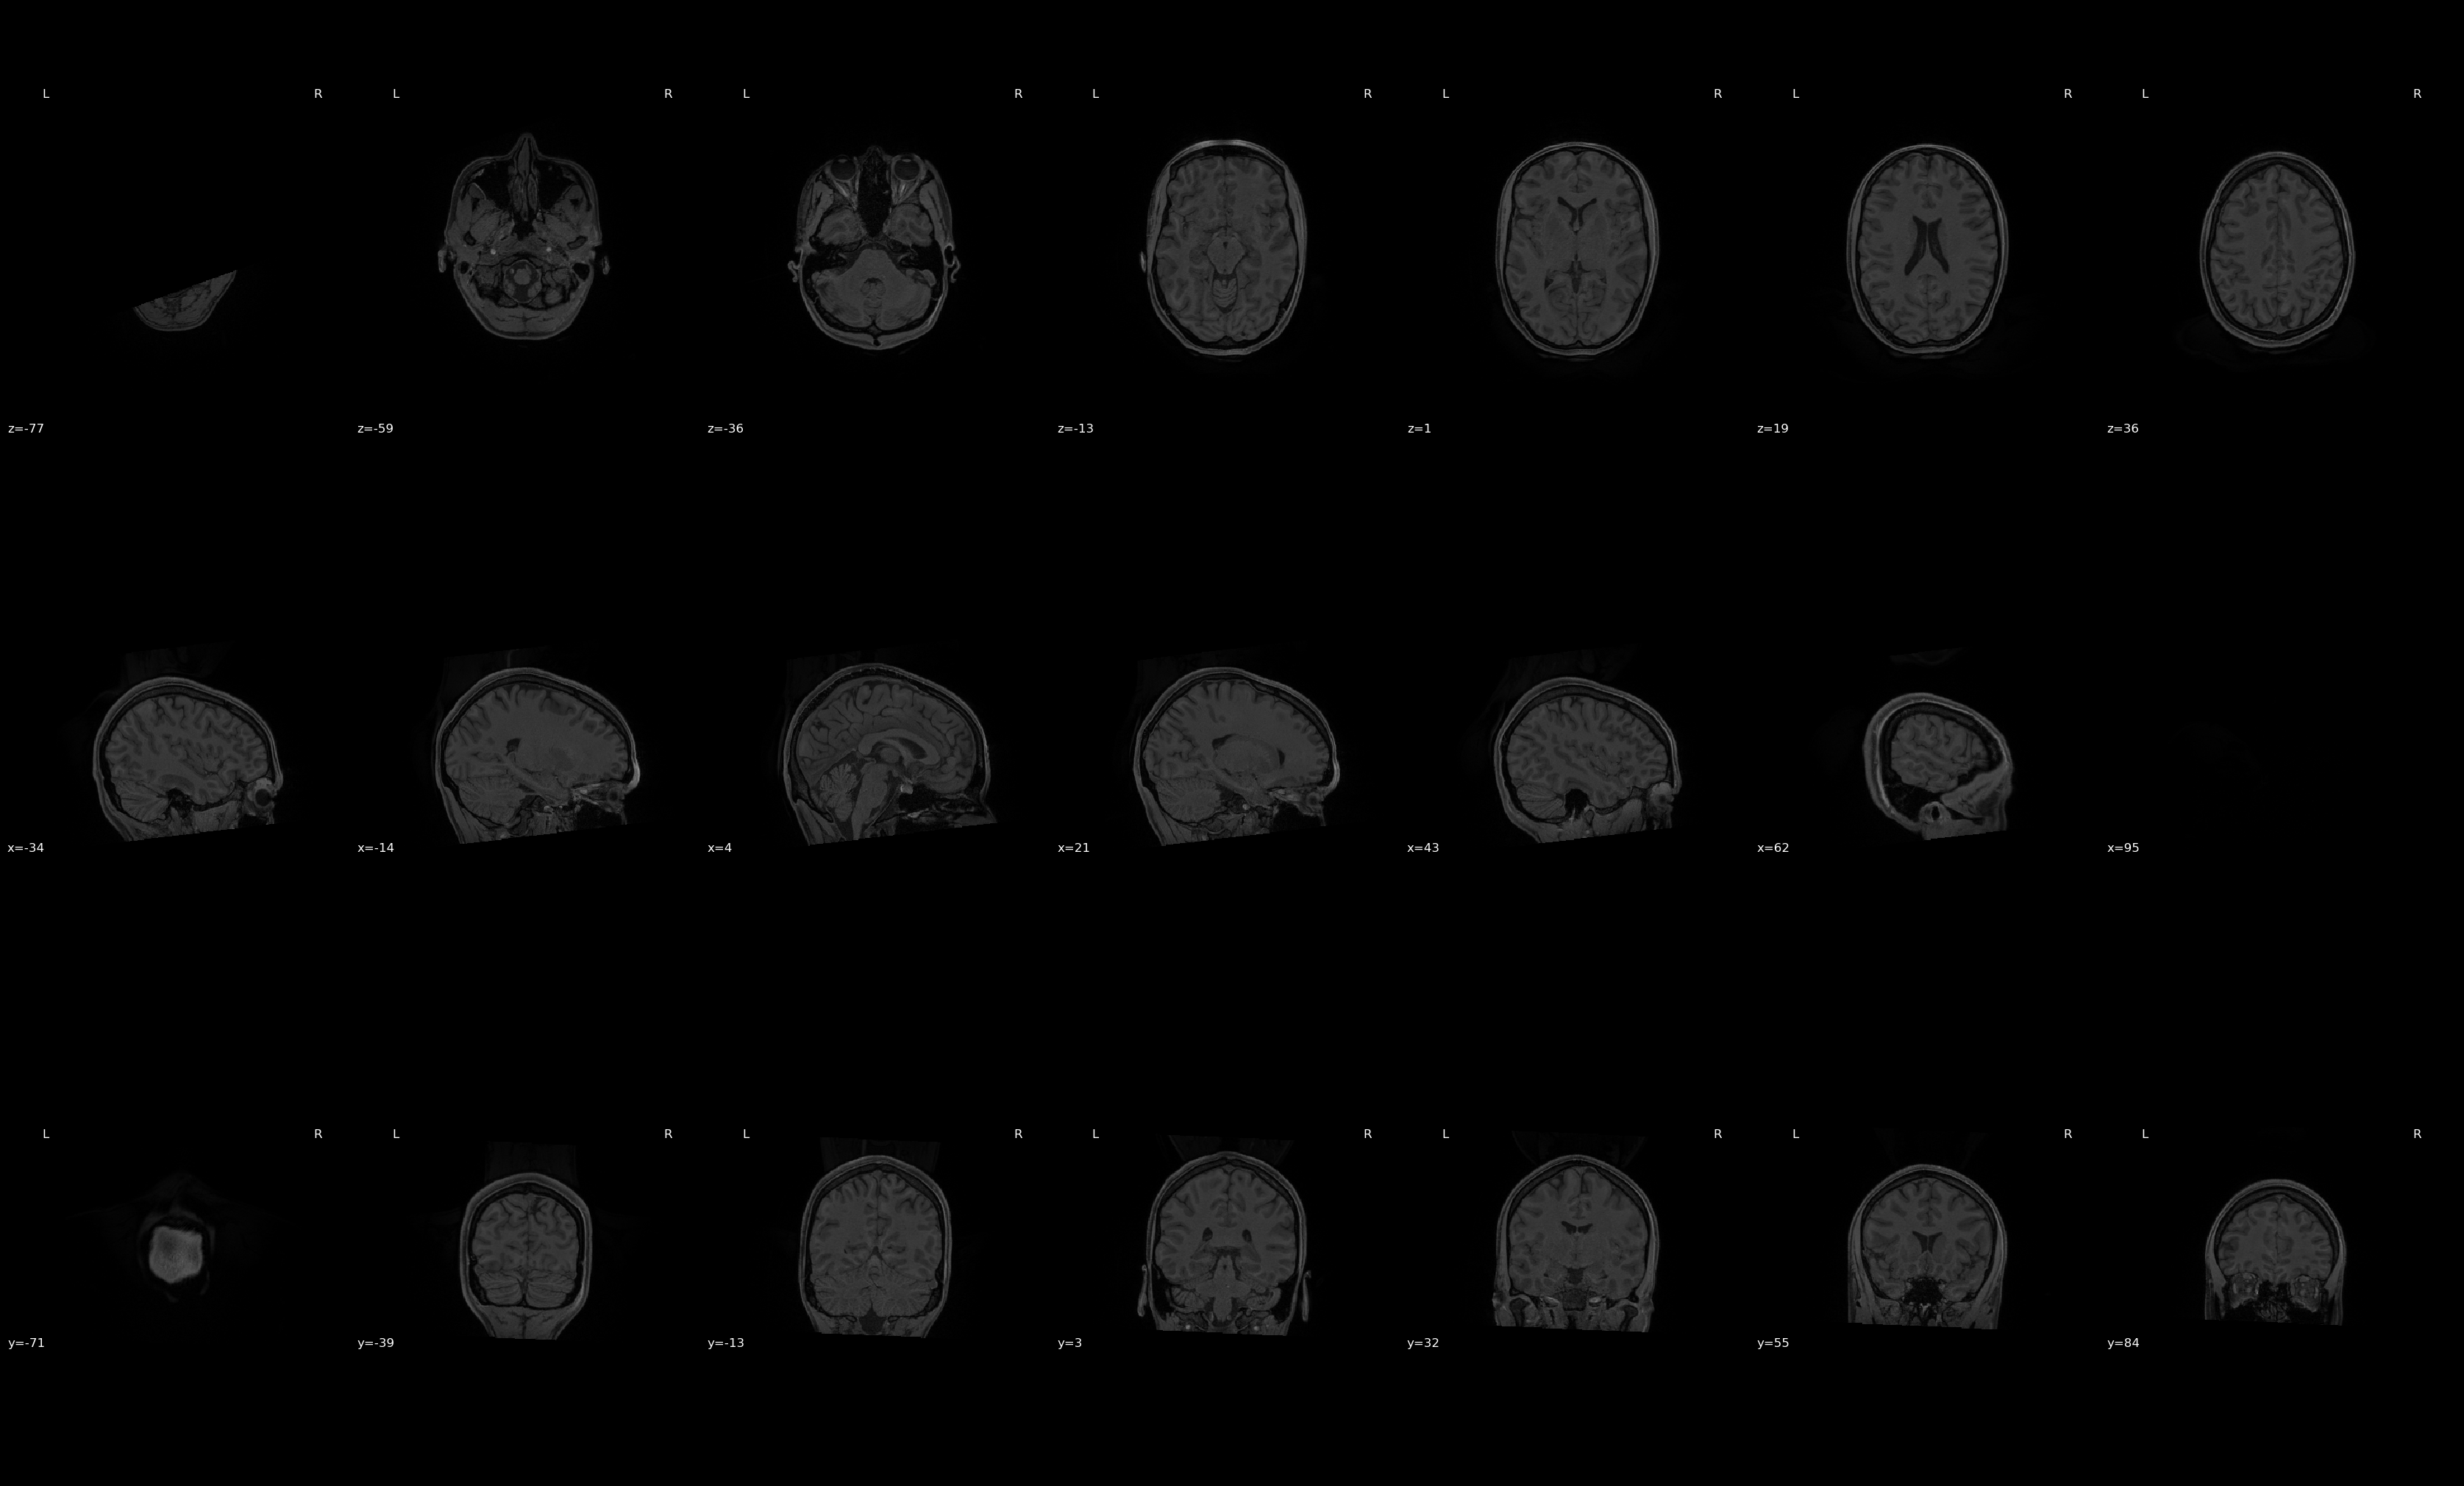

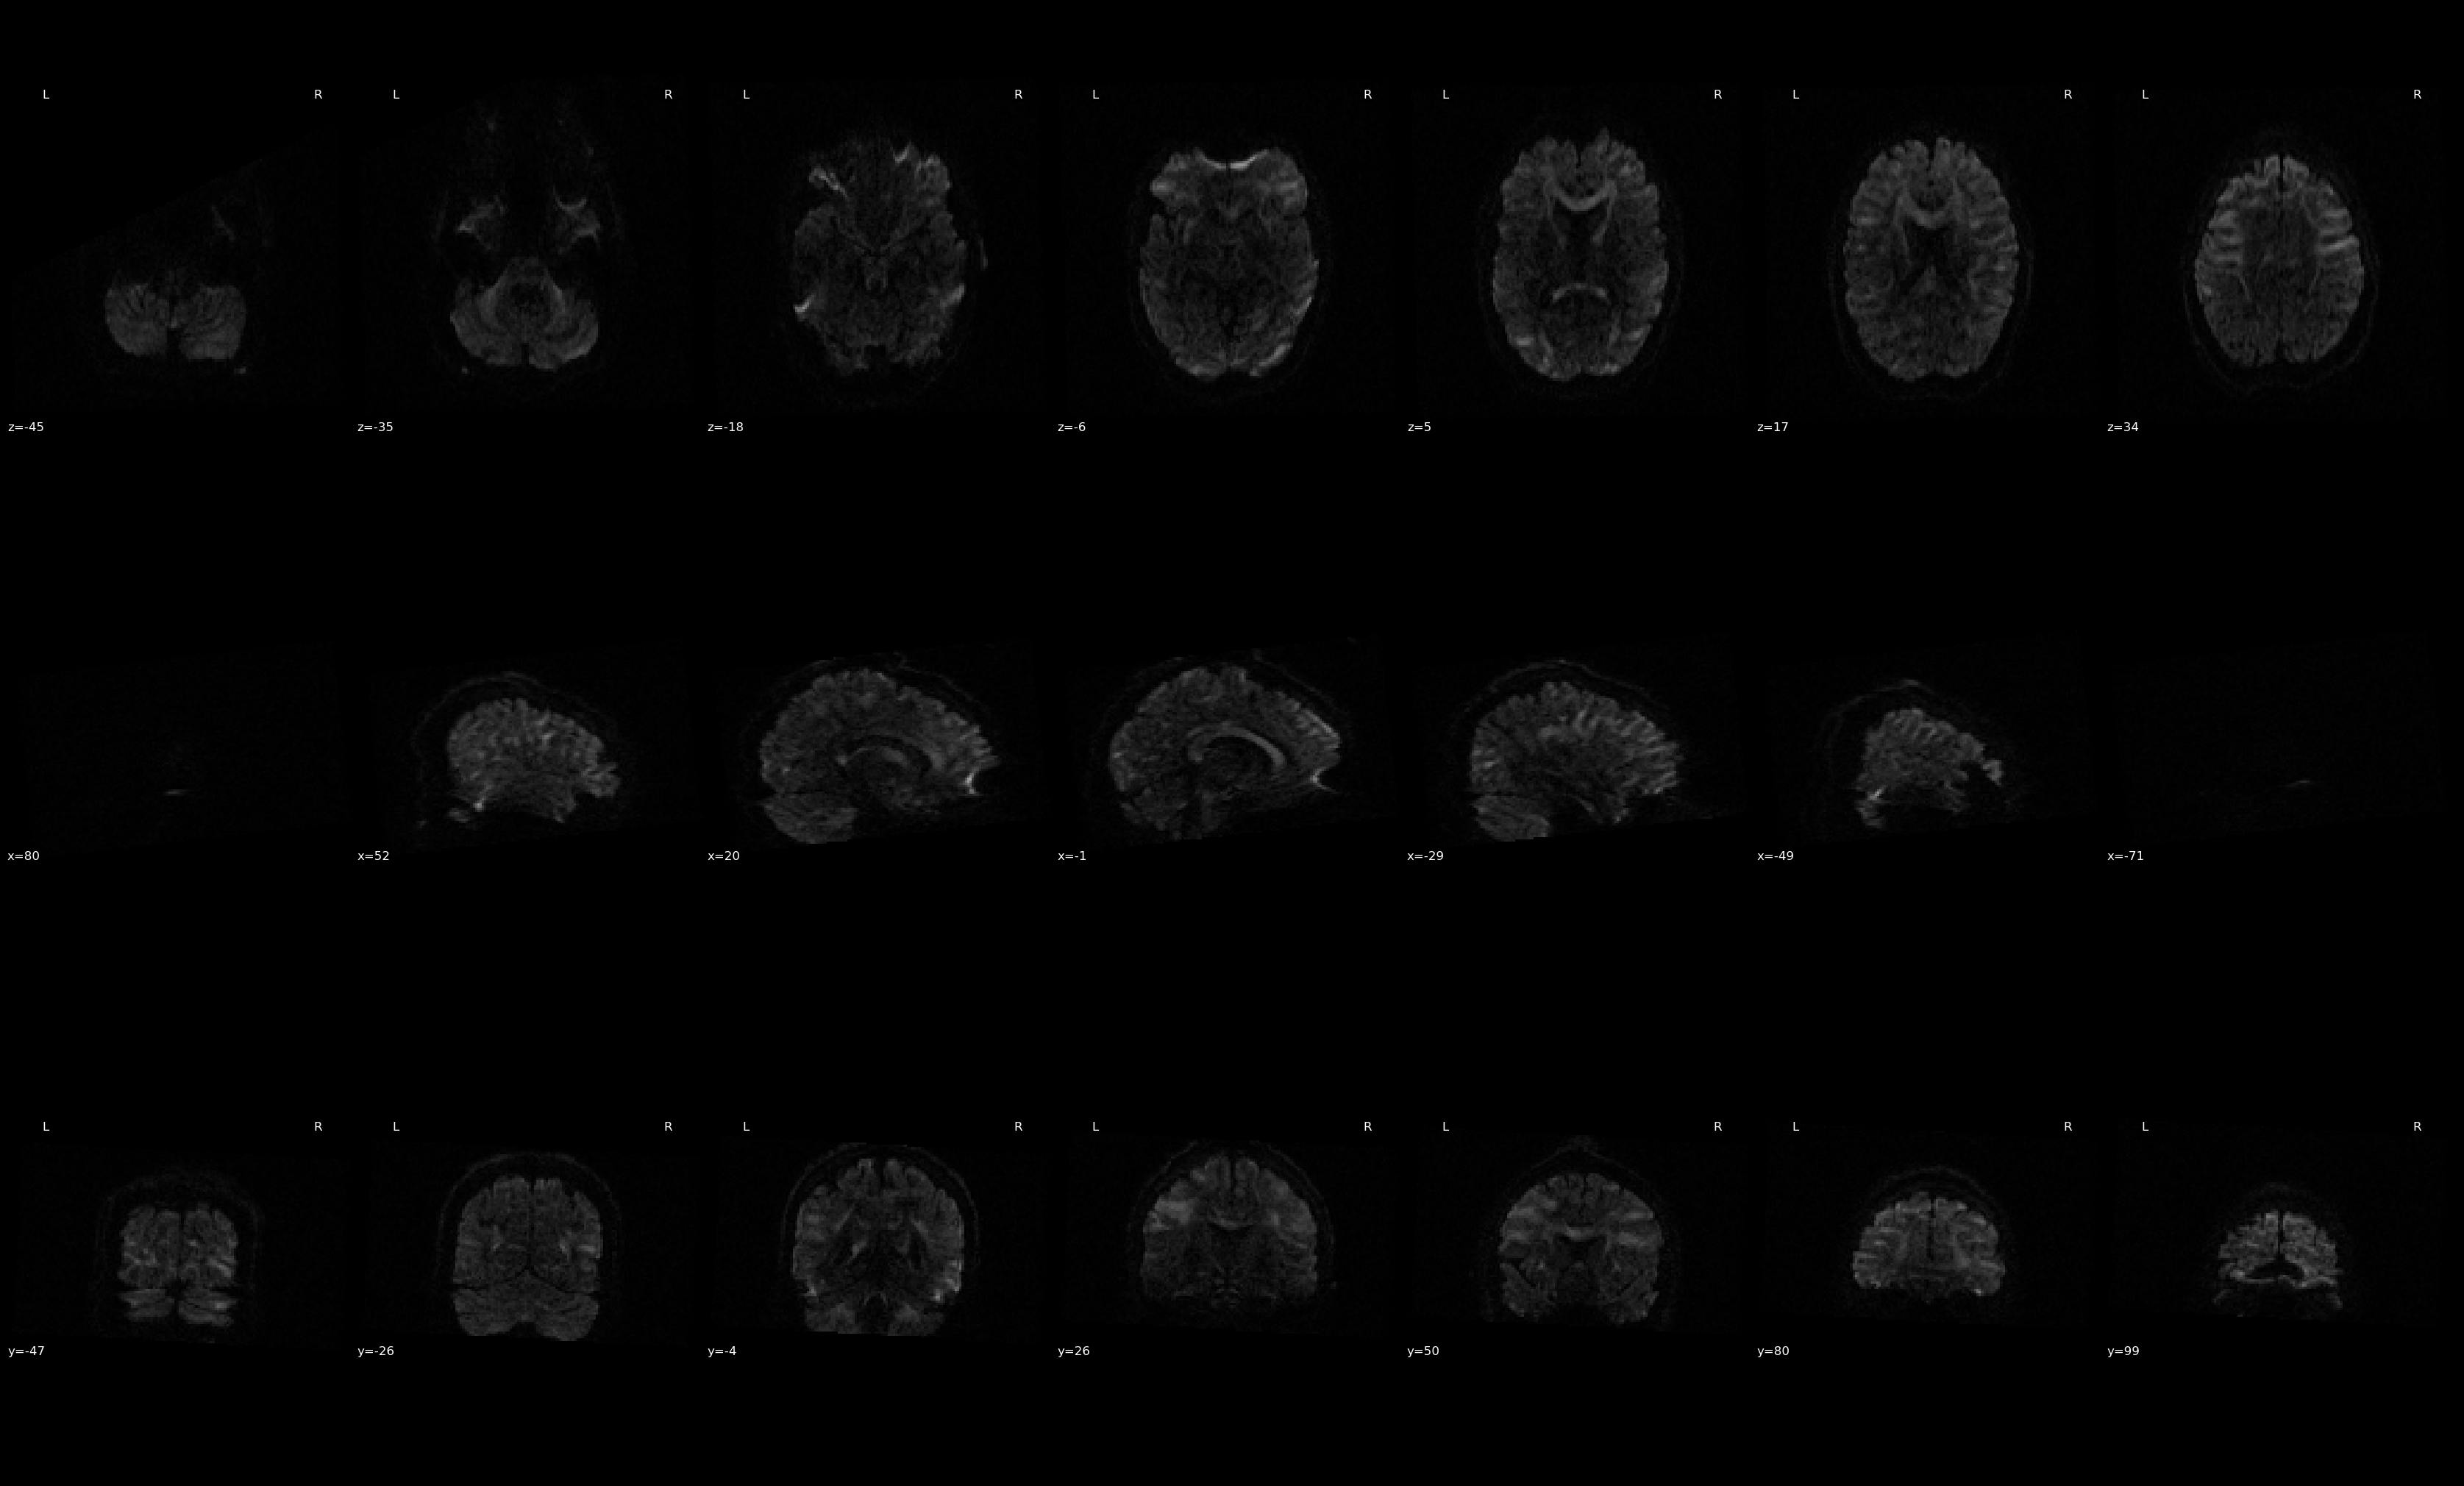

In [45]:
from nilearn import plotting, image

plotting.plot_anat(image.index_img('/Users/h/Documents/projects_local/sandbox/source_epi/sub-0010_ses-01_task-social_acq-mb8_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 200), 
                   draw_cross=False, 
                   display_mode='mosaic')

plotting.plot_anat('/Users/h/Documents/projects_local/sandbox/source_epi/sub-0010_ses-01_acq-MPRAGEXp3X08mm_desc-preproc_T1w.nii.gz', 
                   draw_cross=False, 
                   display_mode='mosaic')

plotting.plot_anat(image.index_img('/Users/h/Documents/projects_local/sandbox/source_epi/sub-0010_ses-01_acq-96dirX6b0Xmb_dwi.nii.gz', 50), 
                   draw_cross=False, 
                   display_mode='mosaic')